# Technical Assessment Project - Yuanwei Chai

# Data Pre-processing

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.ensemble import IsolationForest 

import scipy.stats as stats 
from scipy.stats import boxcox
from sklearn.experimental import enable_iterative_imputer 

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data Preparation

### Load and read data

In [2]:
# Load Dataset 1 - General 
dataset1 = pd.read_excel('DataScientist_009749_Dataset.xlsx', sheet_name='Dataset 1 - General') 
dataset1.head()

,Unnamed: 0,NWP (£m),NWP (£m) .1,NWP (£m) .2,NWP (£m) .3,NWP (£m) .4,SCR (£m),SCR (£m).1,SCR (£m).2,SCR (£m).3,SCR (£m).4,EoF for SCR (£m),EoF for SCR (£m).1,EoF for SCR (£m).2,EoF for SCR (£m).3,EoF for SCR (£m).4,SCR coverage ratio,SCR coverage ratio.1,SCR coverage ratio.2,SCR coverage ratio.3,SCR coverage ratio.4,GWP (£m),GWP (£m).1,GWP (£m).2,GWP (£m).3,GWP (£m).4,Total assets (£m),Total assets (£m).1,Total assets (£m).2,Total assets (£m).3,Total assets (£m).4,Total liabilities (£m),Total liabilities (£m).1,Total liabilities (£m).2,Total liabilities (£m).3,Total liabilities (£m).4,Excess of assets over liabilities (£m) [= equity],Excess of assets over liabilities (£m) [= equity].1,Excess of assets over liabilities (£m) [= equity].2,Excess of assets over liabilities (£m) [= equity].3,Excess of assets over liabilities (£m) [= equity].4
0,NaN,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE
1,Firm 1,-17754.100486,0,0,0,0,2021.321862,0.0,0,0,0,2416.559785,3.796177,0,0,0,0.16252,55887003.057573,0,0,0,46.76803,0,0,0,0,63676.869102,9.566096,0,0,0,40171.683156,0,0,0,0,1243.924991,4.398725,0,0,0
2,Firm 2,9.244369,0.098771,40.812426,35.643071,13.626145,16.459756,15.009073,14.227214,15.037066,1.591638,33.896967,20.945314,78.471172,47.730675,28.784162,5.648647,3.683321,10.239507,5.79278,3.170682,41.794375,6.185296,11.578801,3.891801,16.723242,78.776524,23.312488,56.342326,98.817107,2.665741,7.970519,12.796789,11.332857,6.73019,16.173862,8.755261,48.425189,0.070823,43.36838,12.456319
3,Firm 3,0,0.80613,36.620199,86.630018,54.74418,486.887796,495.786299,626.612217,81.242579,362.092922,693.522688,767.252203,582.602328,114.819729,841.932676,1.135498,1.713763,1.222781,1.348312,0.245283,0,68.10515,138.083316,148.586347,38.119418,54.678352,2321.107129,1961.545731,226.505917,540.594671,68.000844,1592.310597,1005.328927,593.689101,374.712155,210.918808,100.776891,87.586067,922.487659,412.466207
4,Firm 4,19677.453353,41072.816156,20885.506445,14719.672914,49204.465136,15975.652771,15367.887099,10797.123319,22788.359468,16090.31042,29997.674279,36644.404797,10096.977933,8536.234831,41636.299252,0.679158,1.224834,2.699102,2.025206,1.195829,43375.80696,23689.616367,68276.763997,41081.453449,37761.883321,64985.734421,51060.069858,138993.228535,105167.623526,37423.543261,48416.743356,30870.226541,68145.069079,92600.140108,92273.053968,24862.167211,7191.961836,12910.346383,12586.973993,24127.839035


In [3]:
# Load Dataset 2 - Underwriting 
dataset2 = pd.read_excel('DataScientist_009749_Dataset.xlsx', sheet_name='Dataset 2 - Underwriting') 
dataset2.head() 

,Unnamed: 0,Gross claims incurred (£m),Gross claims incurred (£m).1,Gross claims incurred (£m).2,Gross claims incurred (£m).3,Gross claims incurred (£m).4,"Gross BEL (inc. TPs as whole, pre-TMTP) (£m)","Gross BEL (inc. TPs as whole, pre-TMTP) (£m).1","Gross BEL (inc. TPs as whole, pre-TMTP) (£m).2","Gross BEL (inc. TPs as whole, pre-TMTP) (£m).3","Gross BEL (inc. TPs as whole, pre-TMTP) (£m).4","Net BEL (inc. TPs as a whole, pre-TMTP) (£m)","Net BEL (inc. TPs as a whole, pre-TMTP) (£m).1","Net BEL (inc. TPs as a whole, pre-TMTP) (£m).2","Net BEL (inc. TPs as a whole, pre-TMTP) (£m).3","Net BEL (inc. TPs as a whole, pre-TMTP) (£m).4",Pure net claims ratio,Pure net claims ratio.1,Pure net claims ratio.2,Pure net claims ratio.3,Pure net claims ratio.4,Net expense ratio,Net expense ratio.1,Net expense ratio.2,Net expense ratio.3,Net expense ratio.4,Net combined ratio,Net combined ratio.1,Net combined ratio.2,Net combined ratio.3,Net combined ratio.4,Pure gross claims ratio,Pure gross claims ratio.1,Pure gross claims ratio.2,Pure gross claims ratio.3,Pure gross claims ratio.4,Gross expense ratio,Gross expense ratio.1,Gross expense ratio.2,Gross expense ratio.3,Gross expense ratio.4,Gross combined ratio,Gross combined ratio.1,Gross combined ratio.2,Gross combined ratio.3,Gross combined ratio.4
0,NaN,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE
1,Firm 1,0,0.005515,0,0,0,0,0.588994,0,0,0,0,9.894597,0,0,0,0,17.184308,0,0,0,0,41.01306,0,0,0,0,71.298841,0,0,0,0,17.534691,0,0,0,0,77.251254,0,0,0,0,0.675051,0,0,0
2,Firm 2,44.467865,29.489599,34.100482,0,0,221.32768,59.474691,266.118414,0,0,45.459689,239.072672,244.267885,0,0,0.159865,0.229999,0.088372,0,0,0.843672,0.738405,1.370776,0,0,1.276296,2.176071,0.687316,0,0,0.178342,0.03475,0.243491,0,0,0.391179,0.685941,1.433284,0,0,1.750946,1.321523,1.545325,0,0
3,Firm 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Firm 4,14.340938,71.062447,87.912471,42.280402,3.668494,-35.112768,7.848685,100.87627,167.959536,0.057599,-1.45839,12.273378,56.129052,146.187939,38.903549,1.38442,1.797951,3.457891,0.003848,-5.765024,0.338678,0.006629,0.083977,0.091667,-0.118384,0.672481,1.986952,1.841528,3.817221,-3.548731,0.060352,1.307666,2.521607,0.273746,-9.382389,0.231139,0.285471,0.05415,0.051848,-0.162883,1.047234,0.476384,3.307379,1.247403,-2.303093


### Reshape data

In [4]:
# Define function to restructure dataset for better analysis 
def reshape_data(data, metric_labels, sheet_name=None): 
    
    """ 
    Parameters: 
    data (pd.DataFrame): The dataset to reshape
    metric_labels (list): A list of metric labels in the dataset
    sheet_name (string): Path to the dataset sheet. If provided, the dataset will be loaded from this sheet in the file

    Returns: 
    pd.DataFrame: The reshaped dataset

    """ 
    
    # Load the dataset if a sheet name is provided 
    if sheet_name is not None: 
        data = pd.read_excel('DataScientist_009749_Dataset.xlsx', sheet_name, header=1) 

    # Extract unique years from the column headers, excluding non-year entries 
    years = set(col.split(' ')[-1] for col in data.columns if col.split(' ')[-1].endswith('YE')) 

    # Create a new DataFrame for the reshaped data including all metrics 
    reshaped_data = pd.DataFrame() 

    # Iterate over each firm 
    for firm in data['Unnamed: 0'].unique(): 
        # Extract the firm number and converting to an integer 
        firm_number = round(int(firm.split(' ')[-1])) 

        # Extract data for the firm 
        firm_data = data[data['Unnamed: 0'] == firm] 
  

        # Iterate over each year 
        for year in years: 

            # Extract the year number and converting to an integer 
            year_number = year.replace('YE', '')

            # Initialise a dictionary to hold the reshaped row data 
            reshaped_row = {'Firm': firm_number, 'Year': year_number} 
  
            # Iterate over each metric 
            for i, metric in enumerate(metric_labels): 
                metric_column_name = f'{year}.{i}' if f'{year}.{i}' in firm_data.columns else year 
                reshaped_row[metric] = firm_data[metric_column_name].values[0] if metric_column_name in firm_data.columns else None 

            # Add the reshaped row to the DataFrame 
            reshaped_data = reshaped_data.append(reshaped_row, ignore_index=True) 


    # Sort the data by 'Firm' and 'Year'  
    reshaped_data_sorted = reshaped_data.sort_values(by=['Firm', 'Year'], ascending=[True, False]) 
    return reshaped_data_sorted.reset_index(drop = True)


In [5]:
# Define metric labels for dataset 1
metric_labels_data1 = [ 
    "NWP (£m)",  
    "SCR (£m)",  
    "EoF for SCR (£m)",  
    "SCR coverage ratio",  
    "GWP (£m)",  
    "Total assets (£m)",  
    "Total liabilities (£m)",  
    "Equity (£m)" 
] 

# Reshape datatset 1
df1_cleaned = reshape_data(data=dataset1, metric_labels=metric_labels_data1, sheet_name='Dataset 1 - General')
df1_cleaned.head()

,Firm,Year,NWP (£m),SCR (£m),EoF for SCR (£m),SCR coverage ratio,GWP (£m),Total assets (£m),Total liabilities (£m),Equity (£m)
0,1,2020,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
1,1,2019,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
2,1,2018,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
3,1,2017,0.000000,6.940043e-09,3.796177,5.588700e+07,0.00000,9.566096,0.000000,4.398725
4,1,2016,-17754.100486,2.021322e+03,2416.559785,1.625197e-01,46.76803,63676.869102,40171.683156,1243.924991


In [6]:
# Check data type
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Firm                    1625 non-null   int64  
 1   Year                    1625 non-null   object 
 2   NWP (£m)                1625 non-null   float64
 3   SCR (£m)                1625 non-null   float64
 4   EoF for SCR (£m)        1625 non-null   float64
 5   SCR coverage ratio      1625 non-null   float64
 6   GWP (£m)                1625 non-null   float64
 7   Total assets (£m)       1625 non-null   float64
 8   Total liabilities (£m)  1625 non-null   float64
 9   Equity (£m)             1625 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 127.1+ KB


In [7]:
# Get summary
df1_cleaned.describe()

,Firm,NWP (£m),SCR (£m),EoF for SCR (£m),SCR coverage ratio,GWP (£m),Total assets (£m),Total liabilities (£m),Equity (£m)
count,1625.000000,1625.000000,1625.000000,1625.000000,1.625000e+03,1625.000000,1625.000000,1625.000000,1625.000000
mean,163.000000,731.756135,346.635184,504.096123,1.228704e+06,936.694961,7244.856179,7080.304690,539.107196
std,93.847855,3969.009525,1570.005997,2262.296981,3.383049e+07,4757.190907,33462.818642,33527.811705,2174.167392
min,1.000000,-17754.100486,0.000000,-162.245016,-3.488211e+00,-19.777480,-207.356238,-1487.107764,-123.609578
25%,82.000000,0.000000,0.738866,2.879599,2.914672e-01,0.000000,6.543713,0.847367,3.515754
50%,163.000000,3.625627,11.637984,25.548589,1.587490e+00,8.686859,85.932872,45.545844,29.582864
75%,244.000000,90.225184,91.415724,162.428978,3.061232e+00,178.699850,926.199445,643.826070,166.413248
max,325.000000,75526.673293,22788.359468,41636.299252,9.993029e+08,74078.635849,553549.903858,494498.525611,26705.042053


In [8]:
# Define metric labels for dataset 2
metric_labels_data2 = [ 
    "Gross claims incurred (£m)",  
    "Gross BEL (£m)",  
    "Net BEL (£m)",  
    "Pure net claims ratio",  
    "Net expense ratio",  
    "Net combined ratio",  
    "Pure gross claims ratio",  
    "Gross expense ratio",
    "Gross combined ratio"
] 

# Reshape datatset 2
df2_cleaned = reshape_data(data=dataset2, metric_labels=metric_labels_data2, sheet_name='Dataset 2 - Underwriting')
df2_cleaned.head()

,Firm,Year,Gross claims incurred (£m),Gross BEL (£m),Net BEL (£m),Pure net claims ratio,Net expense ratio,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio
0,1,2020,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,1,2019,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,1,2018,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,1,2017,0.005515,0.588994,9.894597,17.184308,41.01306,71.298841,17.534691,77.251254,0.675051
4,1,2016,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [9]:
# Check data type
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Firm                        2280 non-null   int64  
 1   Year                        2280 non-null   object 
 2   Gross claims incurred (£m)  2280 non-null   float64
 3   Gross BEL (£m)              2280 non-null   float64
 4   Net BEL (£m)                2280 non-null   float64
 5   Pure net claims ratio       2280 non-null   float64
 6   Net expense ratio           2280 non-null   float64
 7   Net combined ratio          2280 non-null   float64
 8   Pure gross claims ratio     2280 non-null   float64
 9   Gross expense ratio         2280 non-null   float64
 10  Gross combined ratio        2280 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 196.1+ KB


In [10]:
# Get summary
df2_cleaned.describe()

,Firm,Gross claims incurred (£m),Gross BEL (£m),Net BEL (£m),Pure net claims ratio,Net expense ratio,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio
count,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2.280000e+03,2.280000e+03,2280.000000,2280.000000,2.280000e+03
mean,228.500000,128.384523,285.115521,181.363743,349.188087,-7.911175e+02,-2.403903e+03,422.752181,247.213953,1.744681e+03
std,131.664422,431.408877,1007.437106,637.592586,17372.269636,1.097487e+05,1.145433e+05,20635.934856,12050.858858,8.331728e+04
min,1.000000,-189.936333,-167.815824,-182.381851,-33721.020240,-4.495420e+06,-5.468706e+06,-24817.785823,-16112.406623,-1.406448e+04
25%,114.750000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,228.500000,0.687716,4.514229,1.319210,0.000000,2.420209e-02,5.092779e-02,0.025116,0.039206,9.849834e-02
75%,342.250000,65.630329,146.634626,80.476426,0.532303,4.022814e-01,9.978883e-01,0.602362,0.347480,9.810006e-01
max,456.000000,6844.014131,19292.066525,11351.609021,828809.371523,2.691212e+06,4.318219e+04,985011.303759,575064.786983,3.978266e+06


### Combine and extract data

In [11]:
# Join the 2 datasets on 'Firm' and 'Year' 
df_full = pd.merge(df1_cleaned, df2_cleaned, on=['Firm', 'Year']) 
df_full.head() 

,Firm,Year,NWP (£m),SCR (£m),EoF for SCR (£m),SCR coverage ratio,GWP (£m),Total assets (£m),Total liabilities (£m),Equity (£m),Gross claims incurred (£m),Gross BEL (£m),Net BEL (£m),Pure net claims ratio,Net expense ratio,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio
0,1,2020,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,1,2019,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,1,2018,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,1,2017,0.000000,6.940043e-09,3.796177,5.588700e+07,0.00000,9.566096,0.000000,4.398725,0.005515,0.588994,9.894597,17.184308,41.01306,71.298841,17.534691,77.251254,0.675051
4,1,2016,-17754.100486,2.021322e+03,2416.559785,1.625197e-01,46.76803,63676.869102,40171.683156,1243.924991,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [12]:
df_full.shape

(1625, 19)

In [13]:
df_full.Firm.nunique()

325

In [14]:
# Keep only the key metrics useful for analysis
df_full2 = df_full[['Firm', 'Year', 'GWP (£m)', 'Total assets (£m)', 'NWP (£m)', 'SCR coverage ratio', 'Gross claims incurred (£m)', 'Net combined ratio']]
df_full2.drop(['Firm'], axis=1).describe().round(3) 

,GWP (£m),Total assets (£m),NWP (£m),SCR coverage ratio,Gross claims incurred (£m),Net combined ratio
count,1625.000,1625.000,1625.000,1.625000e+03,1625.000,1625.000
mean,936.695,7244.856,731.756,1.228704e+06,141.659,-11.063
std,4757.191,33462.819,3969.010,3.383049e+07,481.250,2117.644
min,-19.777,-207.356,-17754.100,-3.488000e+00,-74.423,-73450.271
25%,0.000,6.544,0.000,2.910000e-01,0.000,0.000
50%,8.687,85.933,3.626,1.587000e+00,1.459,0.092
75%,178.700,926.199,90.225,3.061000e+00,69.639,1.015
max,74078.636,553549.904,75526.673,9.993029e+08,6844.014,43182.186


In [15]:
df_full2.head()

,Firm,Year,GWP (£m),Total assets (£m),NWP (£m),SCR coverage ratio,Gross claims incurred (£m),Net combined ratio
0,1,2020,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,1,2019,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
2,1,2018,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3,1,2017,0.00000,9.566096,0.000000,5.588700e+07,0.005515,71.298841
4,1,2016,46.76803,63676.869102,-17754.100486,1.625197e-01,0.000000,0.000000


## Data quality check

### Missing values

In [16]:
# Check for missing values in the combined dataset 
missing_values = df_full2.isnull().sum() 
missing_values

Firm                          0
Year                          0
GWP (£m)                      0
Total assets (£m)             0
NWP (£m)                      0
SCR coverage ratio            0
Gross claims incurred (£m)    0
Net combined ratio            0
dtype: int64

### Zero values proportion

In [17]:
# Check for zero values in the combined dataset 
zero_values = df_full2.eq(0).sum()/df_full2.shape[0]
zero_values

Firm                          0.000000
Year                          0.000000
GWP (£m)                      0.316923
Total assets (£m)             0.160615
NWP (£m)                      0.339692
SCR coverage ratio            0.164308
Gross claims incurred (£m)    0.380923
Net combined ratio            0.446154
dtype: float64

### Invalid values

In [18]:
# Dropping all records of firms that have any record with negative GWP 

# Identify firms with any negative GWP 
firms_with_negative_gwp = df_full2[df_full2['GWP (£m)'] < 0]['Firm'].unique() 

# Drop records of these firms 
df_full2 = df_full2[~df_full2['Firm'].isin(firms_with_negative_gwp)] 
df_full2.shape

(1525, 8)

### Outliers

In [19]:
# Function to detect potential outliers using IQR  
def detect_outliers(data, threshold=1.5): 
    
    outliers = {} 
    for column in data.columns: 
        if data[column].dtype in ['float64', 'int64']: 
            Q1 = data[column].quantile(0.25) 
            Q3 = data[column].quantile(0.75) 
            IQR = Q3 - Q1 
            lower_bound = Q1 - (IQR * threshold) 
            upper_bound = Q3 + (IQR * threshold) 
        
            outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)] 
    return outliers 


# Detect potential outliers in the combined dataset 
outliers_detected = detect_outliers(df_full2) 

# Display the number of outliers detected in each field 
outliers_count = {column: len(outliers) for column, outliers in outliers_detected.items() if not outliers.empty} 
df_outliers_count = pd.DataFrame(outliers_count, index=['Outlier count'])
df_outliers_count

,GWP (£m),Total assets (£m),NWP (£m),SCR coverage ratio,Gross claims incurred (£m),Net combined ratio
Outlier count,242,250,285,119,244,66


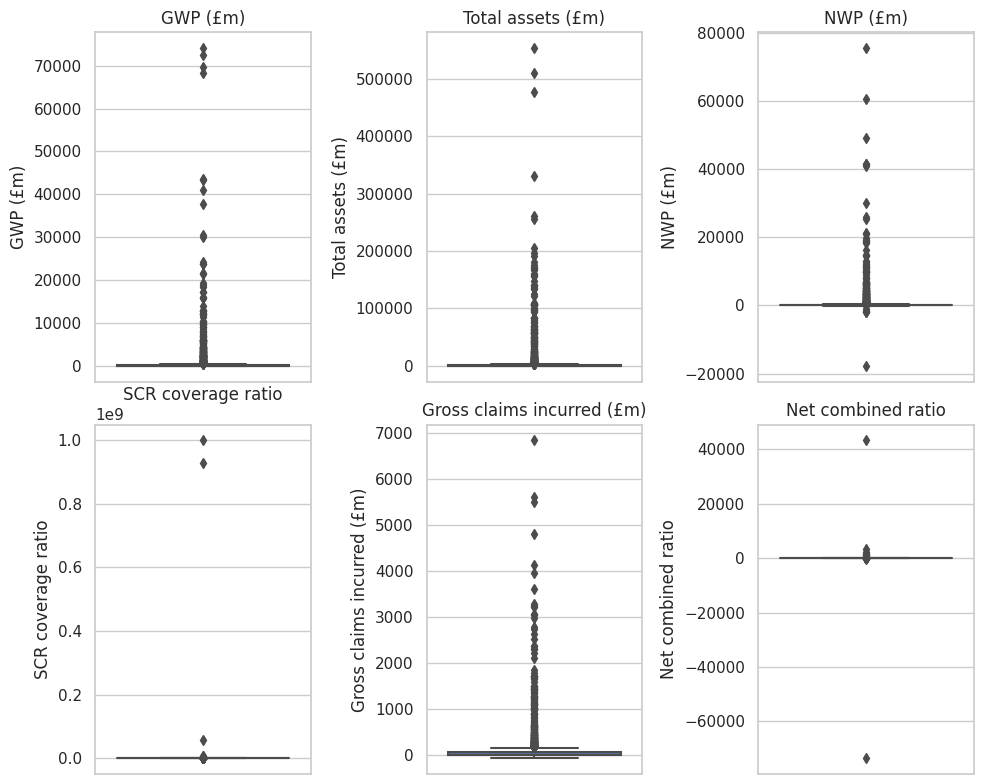

In [20]:
# Plot outliers for each metric
sns.set(style="whitegrid") 

# Columns for which we want to create boxplots 
columns_to_plot = ['GWP (£m)', 'Total assets (£m)', 'NWP (£m)', 'SCR coverage ratio', 'Gross claims incurred (£m)', 'Net combined ratio'] 

# Create boxplots 
plt.figure(figsize=(10, 8)) 

for i, column in enumerate(columns_to_plot, 1): 
    plt.subplot(2, 3, i) 
    sns.boxplot(y=df_full2[column]) 
    plt.title(column) 

plt.tight_layout() 
plt.show() 

In [21]:
# Check extreme outliers based on the oberservations from boxplots
extreme_outliers = df_full2[(df_full2['NWP (£m)'] < -10000) | (df_full2['SCR coverage ratio'] > 10000) 
                    | (df_full2['Net combined ratio'] > 40000) | (df_full2['Net combined ratio'] < -60000)].reset_index(drop = True) 
extreme_outliers

,Firm,Year,GWP (£m),Total assets (£m),NWP (£m),SCR coverage ratio,Gross claims incurred (£m),Net combined ratio
0,1,2017,0.000000,9.566096,0.000000,5.588700e+07,0.005515,71.298841
1,1,2016,46.768030,63676.869102,-17754.100486,1.625197e-01,0.000000,0.000000
2,66,2018,643.736827,2.647278,48.205551,7.161992e+06,0.000000,0.000000
3,99,2017,557.712342,1244.259065,120.760121,1.211951e+00,12.181508,-73450.271014
4,127,2020,0.000000,0.357132,0.000000,8.952928e+04,304.503193,0.000000
5,127,2019,0.000000,0.634975,0.000000,8.453837e+04,20.829588,0.000000
6,127,2018,0.000000,0.244423,0.000000,1.686458e+05,133.402375,0.000000
7,127,2017,0.000000,0.004297,0.000000,2.258551e+05,14.182274,0.000000
8,131,2017,1409.594996,8.144140,11269.334301,9.269834e+08,393.363832,0.370805
9,188,2019,3177.661711,41924.300089,471.304280,3.341957e-01,17.505980,43182.186323


In [22]:
# Drop records of these firms 
extreme_outliers_firm = extreme_outliers['Firm'].unique() 
df_full2_cleaned = df_full2[~df_full2['Firm'].isin(extreme_outliers_firm)] 
df_full2_cleaned.shape

(1485, 8)

In [23]:
# Check number of unique firms
df_full2_cleaned.Firm.nunique()

297

## Feature engineering

### Derive additional variables

In [24]:
df_full3 = df_full2_cleaned.copy()

# Create a new metric 'NWP / GWP' to show how much of the firm’s risk is being passed on to reinsurers, and handle the case where 'GWP (£m)' or 'NWP (£m)' is 0
df_full3['NWP-to-GWP ratio'] = df_full3.apply(lambda row: row['NWP (£m)'] / row['GWP (£m)'] if row['GWP (£m)'] != 0 and row['NWP (£m)'] != 0 else 0, axis=1) 

# Create a dummy variable 'has_enough_capital' based on SCR coverage ratio, 1 if a firm has SCR coverage ratio greater than 1 (100%) and 0 otherwise
df_full3['has_enough_capital'] = np.where(df_full3['SCR coverage ratio'] > 1, 1, 0) 

# Calculate 'capital_surplus' based on 'SCR coverage ratio', surplus is 'SCR coverage ratio' - 1 (100%) if the ratio is greater than 100% and 0 otherwise 
df_full3['capital_surplus'] = df_full3['SCR coverage ratio'].apply(lambda x: max(x - 1, 0) if x > 1 else 0) 

# Create a dummy variable 'has_profit' based on Net combined ratio, 1 if a firm has Net combined ratio less than 1 (100%) and 0 otherwise
df_full3['has_profit'] = np.where(df_full3['Net combined ratio'] < 1, 1, 0) 

df_full3.head()

,Firm,Year,GWP (£m),Total assets (£m),NWP (£m),SCR coverage ratio,Gross claims incurred (£m),Net combined ratio,NWP-to-GWP ratio,has_enough_capital,capital_surplus,has_profit
5,2,2020,16.723242,2.665741,13.626145,3.170682,0.000000,0.000000,0.814803,1,2.170682,1
6,2,2019,3.891801,98.817107,35.643071,5.792780,0.000000,0.000000,9.158504,1,4.792780,1
7,2,2018,11.578801,56.342326,40.812426,10.239507,34.100482,0.687316,3.524754,1,9.239507,1
8,2,2017,6.185296,23.312488,0.098771,3.683321,29.489599,2.176071,0.015969,1,2.683321,0
9,2,2016,41.794375,78.776524,9.244369,5.648647,44.467865,1.276296,0.221187,1,4.648647,0


### Calculate YoY changes

In [25]:
# Create function to calculate year-on-year change correctly for each firm by year 
def calculate_correct_yoy_change(df, column): 

    df = df.sort_values(by=['Firm', 'Year'], ascending=[True, False]).reset_index(drop = True) 

    # Use shift to get the previous value for each firm 
    previous_values = df.groupby('Firm')[column].shift(-1) 

    # Calculate the year-on-year change % 
    df[f'{column} YoY Change'] = (df[column] - previous_values) / previous_values.abs() 

    # Hande division by zero and filling NaNs for first records of each firm with 0 
    df[f'{column} YoY Change'] = df[f'{column} YoY Change'].fillna(0).replace([np.inf, -np.inf], 0) 
    return df 
  
# Apply function to each selected metric 
columns_to_plot = ['NWP-to-GWP ratio', 'capital_surplus', 'Gross claims incurred (£m)', 'Net combined ratio']
for column in columns_to_plot: 
    df_full3 = calculate_correct_yoy_change(df_full3, column) 

    
# Display df_full3 with the YoY change fields 
df_full3[df_full3.columns.tolist()].round(3).head() 


,Firm,Year,GWP (£m),Total assets (£m),NWP (£m),SCR coverage ratio,Gross claims incurred (£m),Net combined ratio,NWP-to-GWP ratio,has_enough_capital,capital_surplus,has_profit,NWP-to-GWP ratio YoY Change,capital_surplus YoY Change,Gross claims incurred (£m) YoY Change,Net combined ratio YoY Change
0,2,2020,16.723,2.666,13.626,3.171,0.000,0.000,0.815,1,2.171,1,-0.911,-0.547,0.000,0.000
1,2,2019,3.892,98.817,35.643,5.793,0.000,0.000,9.159,1,4.793,1,1.598,-0.481,-1.000,-1.000
2,2,2018,11.579,56.342,40.812,10.240,34.100,0.687,3.525,1,9.240,1,219.730,2.443,0.156,-0.684
3,2,2017,6.185,23.312,0.099,3.683,29.490,2.176,0.016,1,2.683,0,-0.928,-0.423,-0.337,0.705
4,2,2016,41.794,78.777,9.244,5.649,44.468,1.276,0.221,1,4.649,0,0.000,0.000,0.000,0.000


In [26]:
df_full3.shape

(1485, 16)

In [27]:
df_full3.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Firm,1485.0,161.364,93.631,2.000,81.000,161.000,243.000,325.000
GWP (£m),1485.0,1011.202,4967.454,0.000,0.000,13.113,217.343,74078.636
Total assets (£m),1485.0,7596.317,34674.191,-207.356,7.544,90.068,991.974,553549.904
NWP (£m),1485.0,802.269,4106.960,-1578.072,0.000,6.127,108.472,75526.673
SCR coverage ratio,1485.0,3.079,8.196,-3.488,0.292,1.538,2.984,170.156
Gross claims incurred (£m),1485.0,133.666,434.059,-74.423,0.000,0.943,62.069,5493.752
Net combined ratio,1485.0,8.332,124.740,-180.399,0.000,0.092,1.015,3157.377
NWP-to-GWP ratio,1485.0,1.779,10.242,-19.689,0.000,0.228,0.957,205.116
has_enough_capital,1485.0,0.613,0.487,0.000,0.000,1.000,1.000,1.000
capital_surplus,1485.0,2.373,8.099,0.000,0.000,0.538,1.984,169.156


## EDA

### Metric trend overview

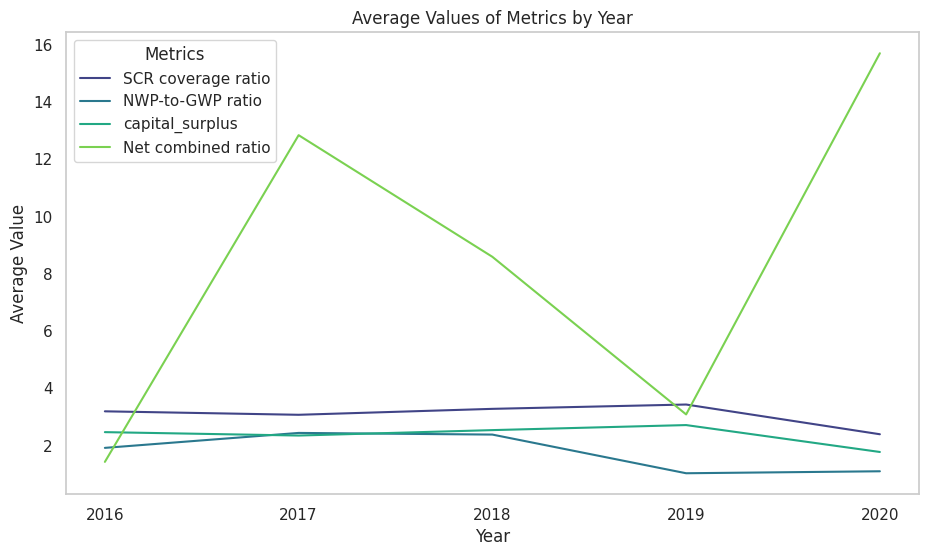

In [28]:
def plot_avg_metrics_by_year(df, metrics, palette='deep'): 

    # new df for plotting 
    plot_data = pd.DataFrame() 

    for metric in metrics: 
        # Extract average values of the metric by year 
        avg_values = df.groupby('Year')[metric].mean().reset_index() 
        avg_values['Metric'] = metric 
        avg_values.rename(columns={metric: 'Average Value'}, inplace=True) 

        # Append to the plot_data df 
        plot_data = pd.concat([plot_data, avg_values], ignore_index=True) 
  
    plt.figure(figsize=(11, 6)) 
    sns.lineplot(data=plot_data, x='Year', y='Average Value', hue='Metric', palette=palette) 
    plt.title('Average Values of Metrics by Year') 
    plt.xlabel('Year') 
    plt.ylabel('Average Value') 
    plt.legend(title='Metrics') 
    plt.grid(False) 
    plt.show() 
    
plot_avg_metrics_by_year(df_full3, [ 'SCR coverage ratio', 'NWP-to-GWP ratio', 'capital_surplus', 'Net combined ratio'], palette='viridis')  

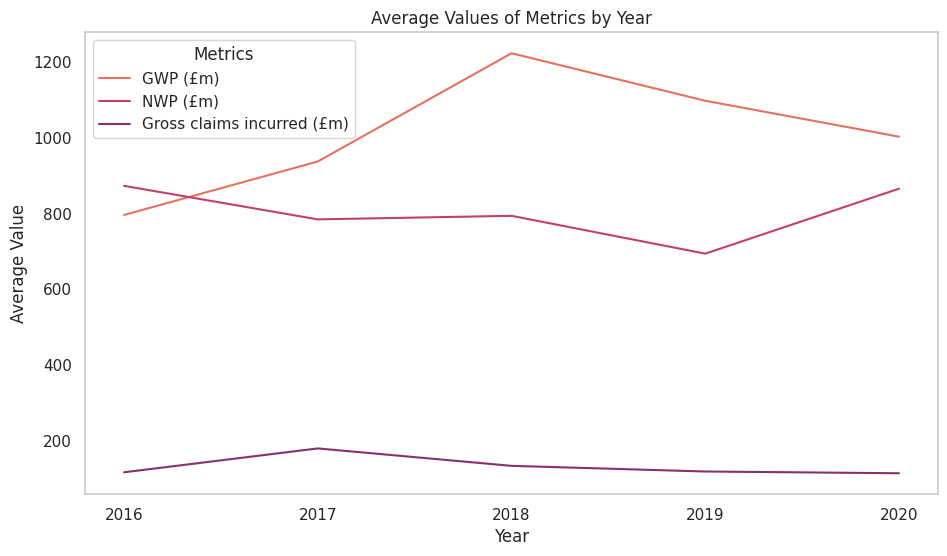

In [29]:
plot_avg_metrics_by_year(df_full3, ['GWP (£m)', 'NWP (£m)', 'Gross claims incurred (£m)'], palette='flare') 

### Firm distribution overview

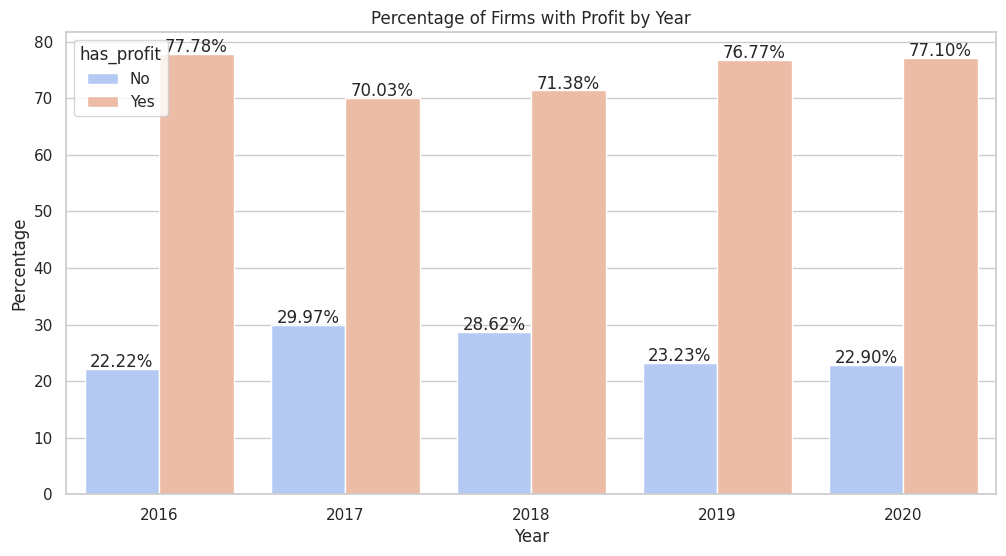

In [30]:
def plot_binary_distribution_by_year(df, binary_var, title, location, palette): 

    # Group the data by year and the binary variable to get the count 
    df_grouped = df.groupby(['Year', binary_var]).size().reset_index(name='count') 

    # Calculate the total number of entries per year for percentage calculation 
    total_per_year = df.groupby('Year').size() 
    df_grouped['percentage'] = df_grouped.apply(lambda x: (x['count'] / total_per_year[x['Year']]) * 100, axis=1) 
    
    df_grouped[binary_var] = df_grouped[binary_var].map({0: 'No', 1: 'Yes'}) 
 
    plt.figure(figsize=(12, 6)) 
    ax = sns.barplot(x='Year', y='percentage', hue=binary_var, data=df_grouped, palette=palette) 

    # Annotate bars
    for p in ax.patches: 
        ax.annotate(format(p.get_height(), '.2f') + '%', (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points') 
    plt.title(title) 
    plt.xlabel('Year') 
    plt.ylabel('Percentage') 
    ax.legend(title=binary_var, loc=location) 
    plt.show() 

# Plot profit based on Net combined ratio
plot_binary_distribution_by_year(df_full3, 'has_profit', 'Percentage of Firms with Profit by Year', location='upper left', palette='coolwarm') 

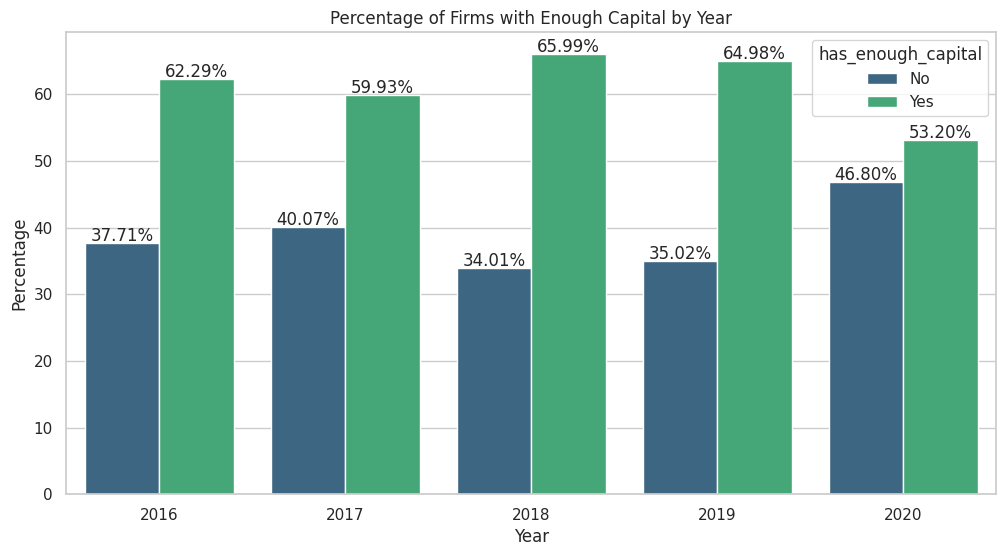

In [31]:
# Plot profit based on SCR coverage ratio
plot_binary_distribution_by_year(df_full3, 'has_enough_capital', 'Percentage of Firms with Enough Capital by Year', location='upper right' , palette='viridis') 

### Firm size

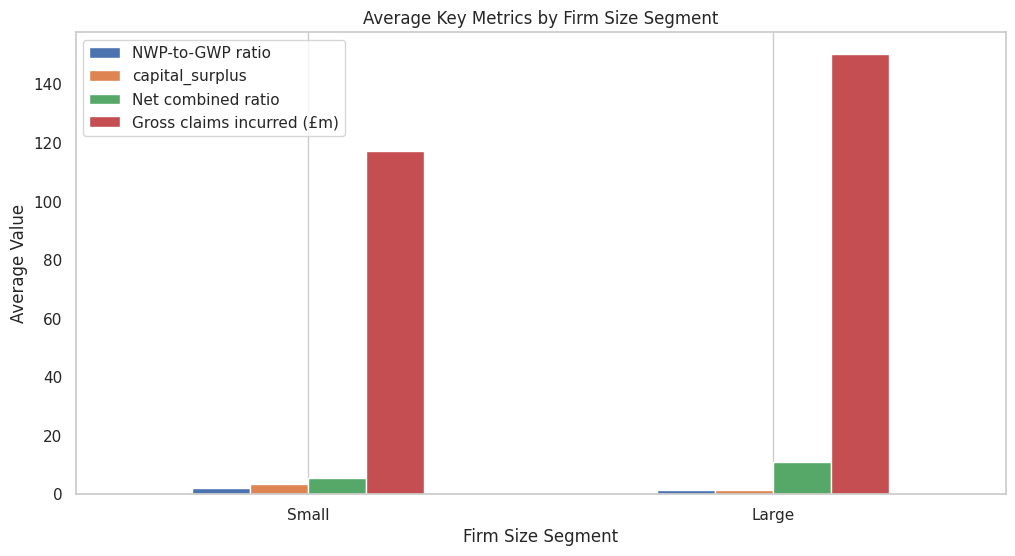

In [32]:
# Segmentation Analysis 
# Determine the segments based on GWP (size) 
gwp_quantiles = df_full3['GWP (£m)'].quantile([0.5]) 
df_full3['Size Segment'] = pd.cut(df_full3['GWP (£m)'], bins=[-np.inf, gwp_quantiles[0.5], np.inf], labels=["Small", "Large"]) 

# Averaging key metrics within each segment 
segmented_metrics = df_full3.groupby('Size Segment')[['NWP-to-GWP ratio', 'capital_surplus', 'Net combined ratio', 'Gross claims incurred (£m)']].mean()


# Plot the results 
segmented_metrics.plot(kind='bar', figsize=(12, 6)) 
plt.title('Average Key Metrics by Firm Size Segment') 
plt.ylabel('Average Value') 
plt.xlabel('Firm Size Segment') 
plt.xticks(rotation=0) 
plt.grid(axis='y') 
plt.show() 

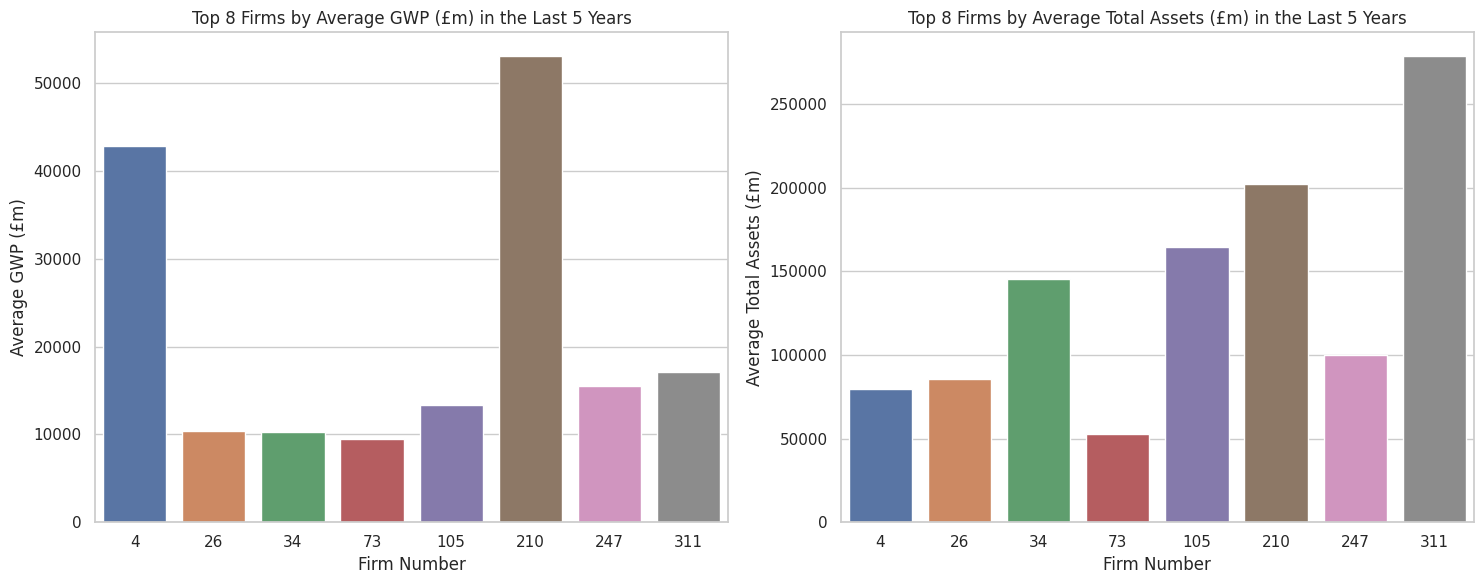

In [42]:
# Calculate the average of GWP and Total Assets over the last 5 years for each firm
df_full3['Year'] = df_full3['Year'].astype('int64')

# Calculate the average of 'GWP (£m)' and 'Total assets (£m)' for each firm 
avg_gwp = df_full3.groupby('Firm')['GWP (£m)'].mean().rename('Avg GWP (£m)') 
avg_assets = df_full3.groupby('Firm')['Total assets (£m)'].mean().rename('Avg Total Assets (£m)') 

# Merge the averages into a single DataFrame 
avg_firm_size = pd.merge(avg_gwp, avg_assets, left_index=True, right_index=True) 

# Sort by both GWP and Total Assets to get the top 8 firms 
top_10_firms = avg_firm_size.sort_values(by=['Avg GWP (£m)', 'Avg Total Assets (£m)'], ascending=False).head(8) 


plt.figure(figsize=(15, 6)) 

# Plot for Average GWP 
plt.subplot(1, 2, 1) 
sns.barplot(x=top_10_firms.index, y='Avg GWP (£m)', data=top_10_firms) 
plt.title('Top 8 Firms by Average GWP (£m) in the Last 5 Years')
plt.xlabel('Firm Number') 
plt.ylabel('Average GWP (£m)') 

# Plot for Average Total Assets 
plt.subplot(1, 2, 2) 
sns.barplot(x=top_10_firms.index, y='Avg Total Assets (£m)', data=top_10_firms) 
plt.title('Top 8 Firms by Average Total Assets (£m) in the Last 5 Years') 
plt.xlabel('Firm Number') 
plt.ylabel('Average Total Assets (£m)') 

plt.tight_layout() 
plt.show() 


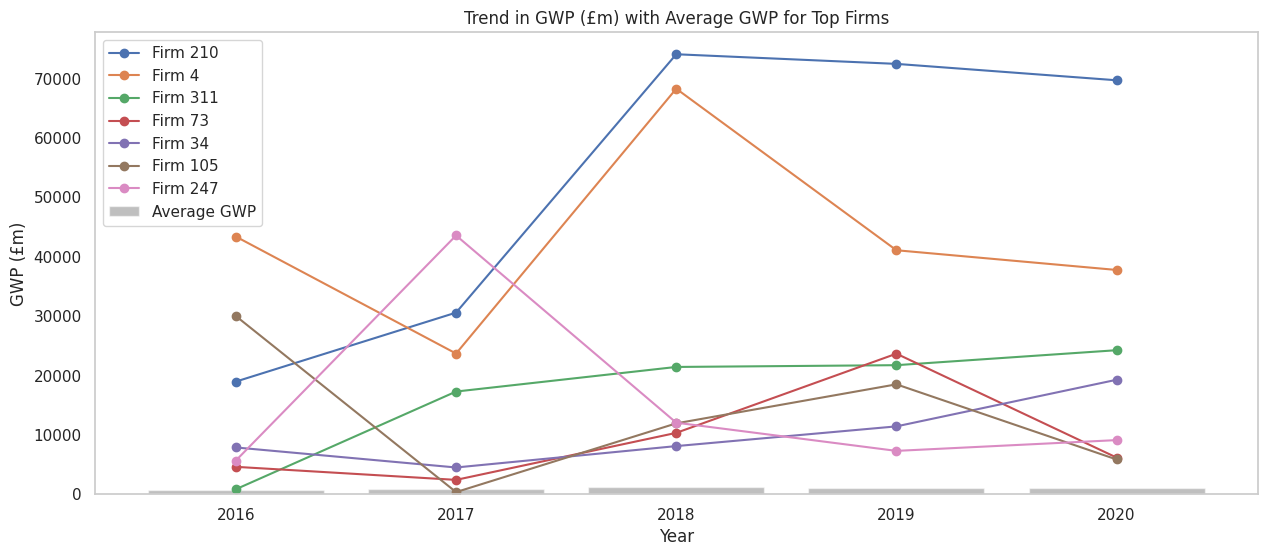

In [41]:
# Function to create trend plots with bar charts showing the average GWP by year 
def trend_plot(df, size_metric, top_n=8, years_to_consider=3): 

    # Identify top firms based on the average of the size metric over the last few years 
    latest_year = df['Year'].max() 
    top_firms = df[df['Year'] > latest_year - years_to_consider].groupby('Firm')[size_metric].mean().nlargest(top_n).index 


    # Filter data for these top firms 
    top_firms_data = df[df['Firm'].isin(top_firms)] 

    # Calculate average GWP by year for all firms 
    avg_gwp_by_year = df.groupby('Year')[size_metric].mean() 
  
    # Create trend plots 
    plt.figure(figsize=(15, 6)) 

    # Bar chart for average GWP by year 
    plt.bar(avg_gwp_by_year.index, avg_gwp_by_year, color='grey', alpha=0.5, label='Average GWP') 

    # Line plots for top firms 
    for firm in top_firms: 
        firm_data = top_firms_data[top_firms_data['Firm'] == firm] 
        plt.plot(firm_data['Year'], firm_data[size_metric], marker='o', label=f'Firm {firm}') 

    plt.title(f'Trend in {size_metric} with Average GWP for Top Firms') 
    plt.xlabel('Year') 
    plt.ylabel(size_metric) 
    plt.legend() 
    plt.grid(False) 
    plt.show() 

# Create trend plots with average GWP for 'GWP (£m)' for the top 5 firms 
trend_plot(df_full3, 'GWP (£m)', top_n=7) 

### Changing business profile - YoY change

#### Calculate average YoY change

In [68]:
# 5-year worth of data avaliable, calculate the average 4-year YoY change by metric for each firm
df_full3 = df_full3.sort_values(by=['Firm', 'Year'], ascending=[True, False]).reset_index(drop = True)

# Avg NWP-to-GWP ratio YoY Change
avg_NWP_to_GWP = df_full3.groupby('Firm')['NWP-to-GWP ratio YoY Change'].apply(lambda x: x.head(4).mean()).reset_index()
df_full4_1 = pd.merge(df_full3,avg_NWP_to_GWP, on='Firm', how='inner')
df_full4_1 = df_full4_1.rename(columns={'NWP-to-GWP ratio YoY Change_x': 'NWP-to-GWP ratio YoY Change'})
df_full4_1 = df_full4_1.rename(columns={'NWP-to-GWP ratio YoY Change_y': 'Avg NWP-to-GWP ratio YoY Change'})

# Avg capital_surplus YoY Change
avg_capital_surplus = df_full4_1.groupby('Firm')['capital_surplus YoY Change'].apply(lambda x: x.head(4).mean()).reset_index()
df_full4_2 = pd.merge(df_full4_1,avg_capital_surplus, on='Firm', how='inner')
df_full4_2 = df_full4_2.rename(columns={'capital_surplus YoY Change_x': 'capital_surplus YoY Change'})
df_full4_2 = df_full4_2.rename(columns={'capital_surplus YoY Change_y': 'Avg capital_surplus YoY Change'})

# Avg Gross claims incurred (£m) YoY Change
avg_gross_claims = df_full4_2.groupby('Firm')['Gross claims incurred (£m) YoY Change'].apply(lambda x: x.head(4).mean()).reset_index()
df_full4_3 = pd.merge(df_full4_2, avg_gross_claims, on='Firm', how='inner')
df_full4_3 = df_full4_3.rename(columns={'Gross claims incurred (£m) YoY Change_x': 'Gross claims incurred (£m) YoY Change'})
df_full4_3 = df_full4_3.rename(columns={'Gross claims incurred (£m) YoY Change_y': 'Avg Gross claims incurred (£m) YoY Change'})

# Avg Net combined ratio YoY Change
avg_ncb = df_full4_3.groupby('Firm')['Net combined ratio YoY Change'].apply(lambda x: x.head(4).mean()).reset_index()
df_full4 = pd.merge(df_full4_3, avg_ncb, on='Firm', how='inner')
df_full4 = df_full4.rename(columns={'Net combined ratio YoY Change_x': 'Net combined ratio YoY Change'})
df_full4 = df_full4.rename(columns={'Net combined ratio YoY Change_y': 'Avg Net combined ratio YoY Change'})

df_full4 = df_full4.round(3)
df_full4.head()

,Firm,Year,GWP (£m),Total assets (£m),NWP (£m),SCR coverage ratio,Gross claims incurred (£m),Net combined ratio,NWP-to-GWP ratio,has_enough_capital,capital_surplus,has_profit,NWP-to-GWP ratio YoY Change,capital_surplus YoY Change,Gross claims incurred (£m) YoY Change,Net combined ratio YoY Change,Size Segment,Avg NWP-to-GWP ratio YoY Change,Avg capital_surplus YoY Change,Avg Gross claims incurred (£m) YoY Change,Avg Net combined ratio YoY Change
0,2,2020,16.723,2.666,13.626,3.171,0.000,0.000,0.815,1,2.171,1,-0.911,-0.547,0.000,0.000,Large,54.872,0.248,-0.295,-0.245
1,2,2019,3.892,98.817,35.643,5.793,0.000,0.000,9.159,1,4.793,1,1.598,-0.481,-1.000,-1.000,Small,54.872,0.248,-0.295,-0.245
2,2,2018,11.579,56.342,40.812,10.240,34.100,0.687,3.525,1,9.240,1,219.730,2.443,0.156,-0.684,Small,54.872,0.248,-0.295,-0.245
3,2,2017,6.185,23.312,0.099,3.683,29.490,2.176,0.016,1,2.683,0,-0.928,-0.423,-0.337,0.705,Small,54.872,0.248,-0.295,-0.245
4,2,2016,41.794,78.777,9.244,5.649,44.468,1.276,0.221,1,4.649,0,0.000,0.000,0.000,0.000,Large,54.872,0.248,-0.295,-0.245


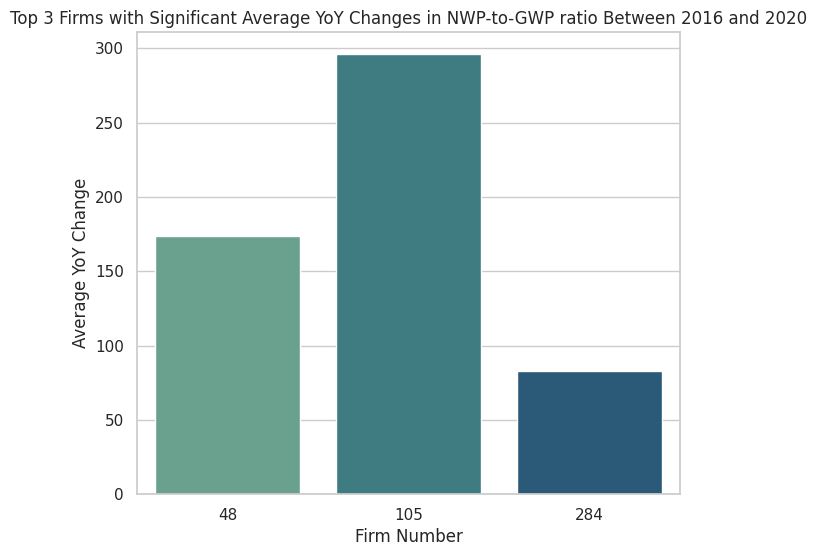

In [69]:
def plot_avg_significant_changes(df, columns, top_n=5): 

    for column in columns: 
        avg_change_column = f'Avg {column} YoY Change' 

        # Sort by the absolute values of average changes to identify top firms with the highest changes 
        top_firms = df[['Firm', avg_change_column]].drop_duplicates() 
        top_firms[avg_change_column] = top_firms[avg_change_column].abs()  # Take absolute value for calculation
        top_firms = top_firms.sort_values(by=avg_change_column, ascending=False).head(top_n) 

  
        plt.figure(figsize=(7, 6)) 
        sns.barplot(x='Firm', y=avg_change_column, data=top_firms, palette=sns.color_palette("crest", n_colors=len(top_firms))) 
        plt.title(f'Top {top_n} Firms with Significant Average YoY Changes in {column} Between 2016 and 2020') 
        plt.ylabel('Average YoY Change') 
        plt.xlabel('Firm Number') 
        plt.show() 
        
# Plot the data for each selected metric 
plot_avg_significant_changes(df_full4, ['NWP-to-GWP ratio'], top_n=3) 

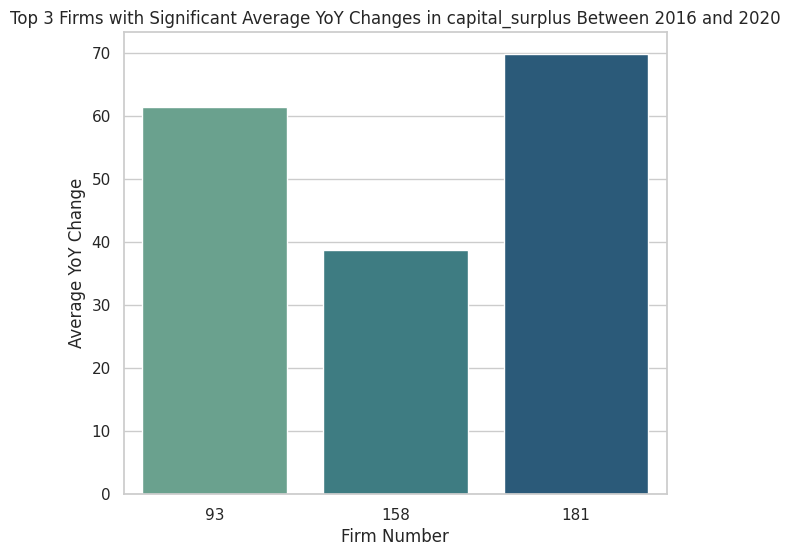

In [70]:
plot_avg_significant_changes(df_full4, ['capital_surplus'], top_n=3) 

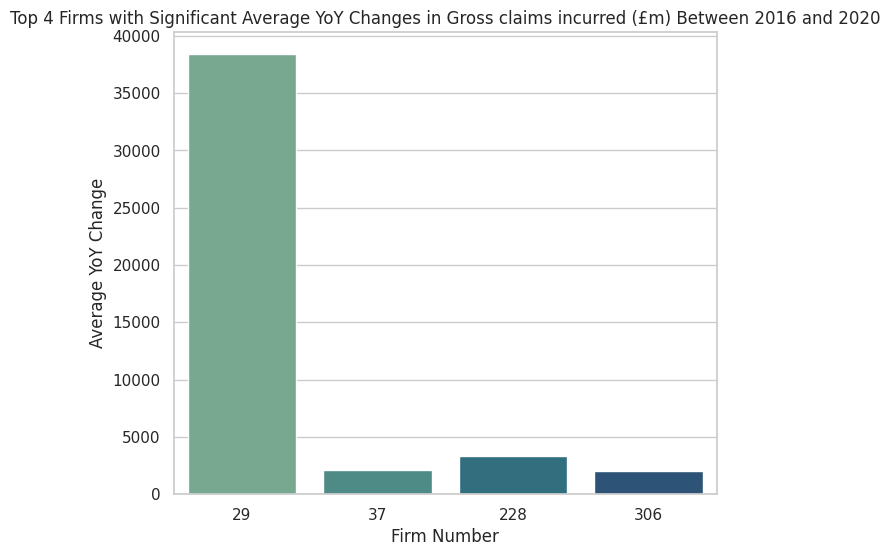

In [71]:
plot_avg_significant_changes(df_full4, ['Gross claims incurred (£m)'], top_n=4) 

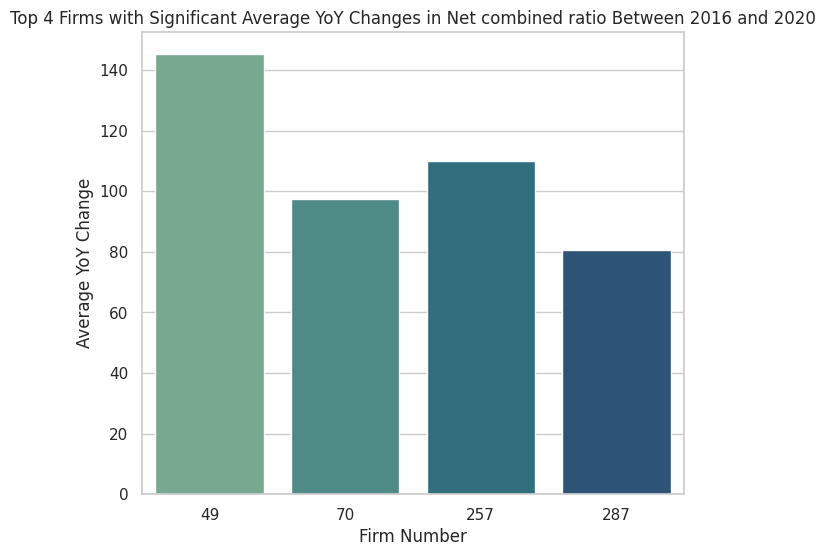

In [72]:
plot_avg_significant_changes(df_full4, ['Net combined ratio'], top_n=4) 

In [73]:
# Data point check
df_full4[df_full4['Firm'] == 29].round(3)

,Firm,Year,GWP (£m),Total assets (£m),NWP (£m),SCR coverage ratio,Gross claims incurred (£m),Net combined ratio,NWP-to-GWP ratio,has_enough_capital,capital_surplus,has_profit,NWP-to-GWP ratio YoY Change,capital_surplus YoY Change,Gross claims incurred (£m) YoY Change,Net combined ratio YoY Change,Size Segment,Avg NWP-to-GWP ratio YoY Change,Avg capital_surplus YoY Change,Avg Gross claims incurred (£m) YoY Change,Avg Net combined ratio YoY Change
135,29,2020,0.0,0.0,0.0,0.0,21.452,2.419,0.0,0,0.0,0,0.0,0.0,153576.045,1.241,Small,0.0,0.0,38394.856,1.918
136,29,2019,0.0,0.0,0.0,0.0,0.000,1.079,0.0,0,0.0,0,0.0,0.0,-1.000,-0.587,Small,0.0,0.0,38394.856,1.918
137,29,2018,0.0,0.0,0.0,0.0,6.539,2.616,0.0,0,0.0,0,0.0,0.0,5.022,0.964,Small,0.0,0.0,38394.856,1.918
138,29,2017,0.0,0.0,0.0,0.0,1.086,1.332,0.0,0,0.0,0,0.0,0.0,-0.641,6.054,Small,0.0,0.0,38394.856,1.918
139,29,2016,0.0,0.0,0.0,0.0,3.021,0.189,0.0,0,0.0,1,0.0,0.0,0.000,0.000,Small,0.0,0.0,38394.856,1.918


### Gross claims YoY trend for top firms 

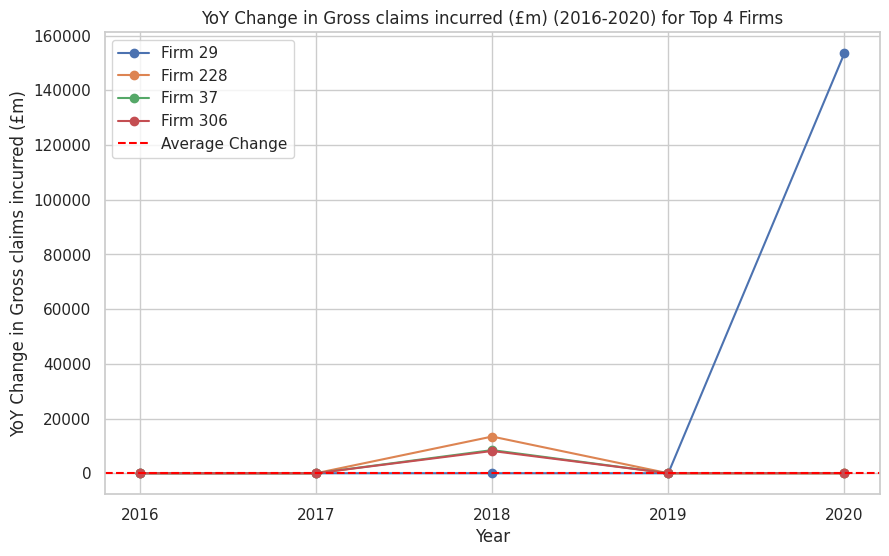

In [734]:
def plot_top_firms_yoy_changes(df, metric, start_year, end_year, top_n=5): 

    # Ensure 'Year' is of integer type 
    df['Year'] = df['Year'].astype('int64') 

    # Filter the data for the specified years 
    df_filtered = df[df['Year'].between(start_year, end_year)] 

    # Sum up the absolute YoY changes for each firm over the period 
    total_yoy_changes = df_filtered.groupby('Firm')[f'{metric} YoY Change'].apply(lambda x: x.abs().sum()) 

    # Identify the top firms with the highest absolute changes 
    top_firms = total_yoy_changes.nlargest(top_n).index 
        

    # Filter the dataset to include only these top firms 
    df_top_firms = df_filtered[df_filtered['Firm'].isin(top_firms)] 

    # Calculate the average YoY change for all firms 
    average_yoy_change = df_filtered[f'{metric} YoY Change'].mean() 

    # Plot the YoY changes for the top firms and the average 
    plt.figure(figsize=(10, 6)) 
    for firm in top_firms: 
        firm_data = df_top_firms[df_top_firms['Firm'] == firm] 
        plt.plot(firm_data['Year'], firm_data[f'{metric} YoY Change'], marker='o', label=f'Firm {firm}') 

    plt.axhline(y=average_yoy_change, color='red', linestyle='--', label='Average Change') 
    plt.title(f'YoY Change in {metric} ({start_year}-{end_year}) for Top {top_n} Firms') 
    plt.xlabel('Year') 
    plt.ylabel(f'YoY Change in {metric}') 
    plt.legend() 
    plt.xticks(range(start_year, end_year + 1))  # Set x-ticks to be integer years 
    plt.grid(True) 
    plt.show()
    
plot_top_firms_yoy_changes(df_full4, 'Gross claims incurred (£m)', 2016, 2020, 4)

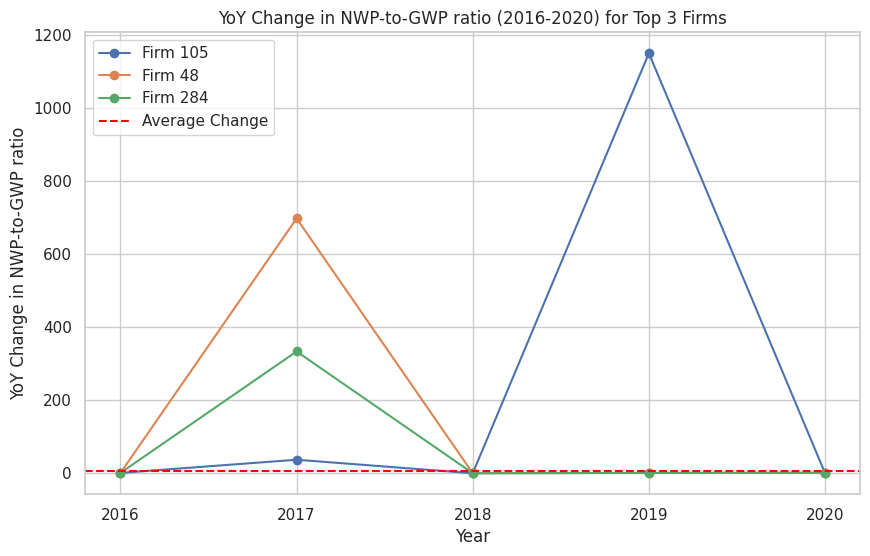

In [736]:
plot_top_firms_yoy_changes(df_full4, 'NWP-to-GWP ratio', 2016, 2020, 3)

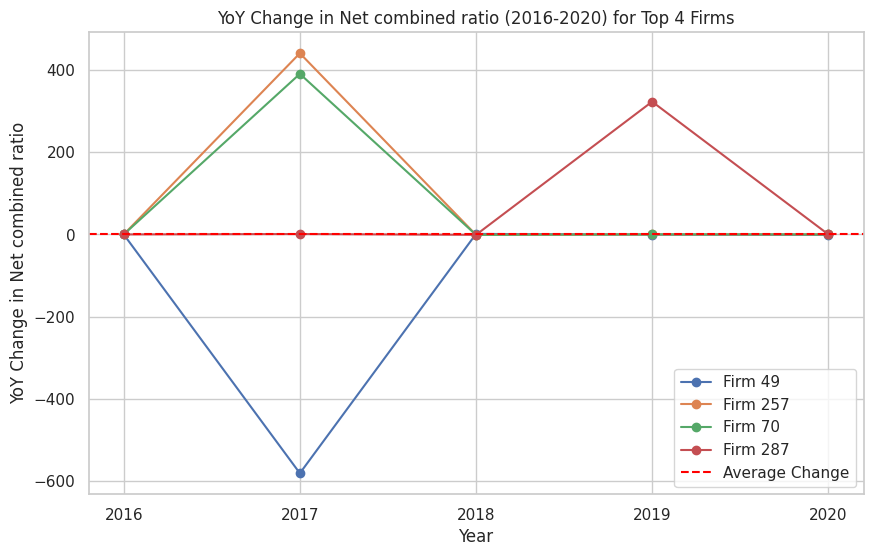

In [737]:
plot_top_firms_yoy_changes(df_full4, 'Net combined ratio', 2016, 2020, 4)

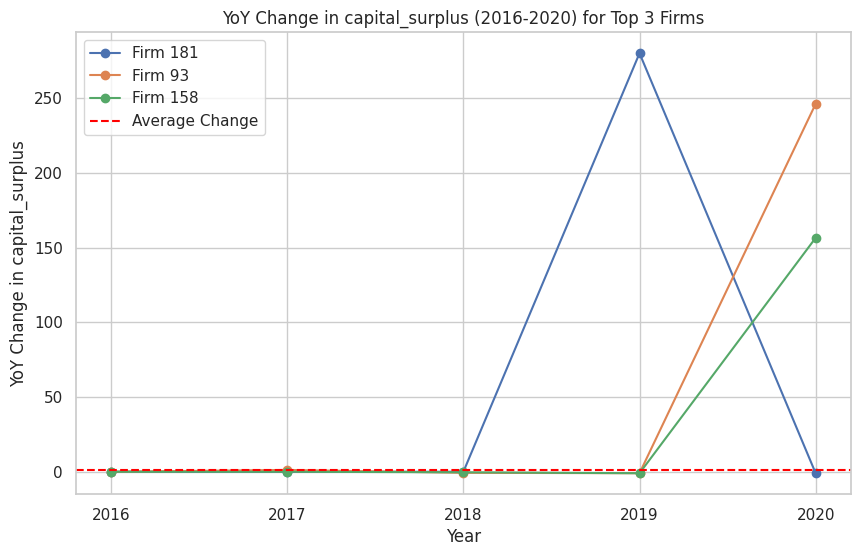

In [738]:
plot_top_firms_yoy_changes(df_full4, 'capital_surplus', 2016, 2020, 3)

### Outlier firms from the norm in 2020

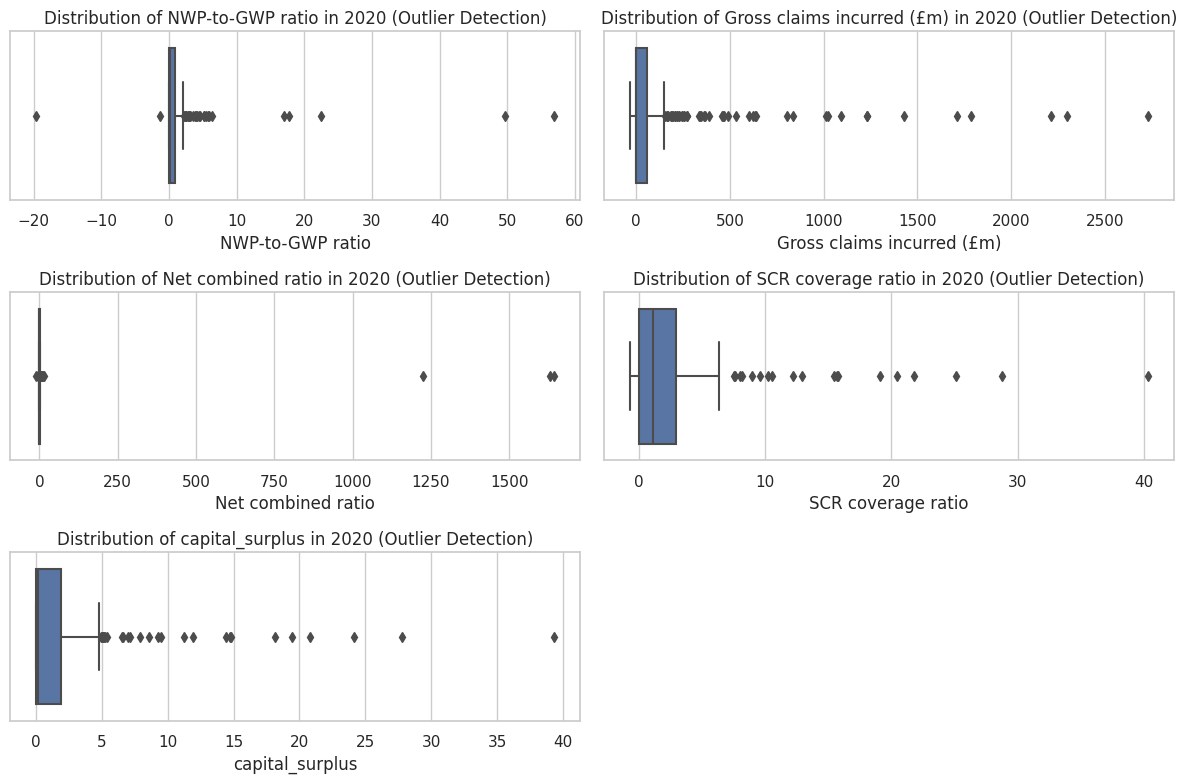

In [709]:
key_metrics = ['NWP-to-GWP ratio', 'Gross claims incurred (£m)', 'Net combined ratio', 'SCR coverage ratio', 'capital_surplus']  
 
# Calculate the mean for each metric per year 
aggregate_yearly_data = df_full4.groupby('Year')[key_metrics].mean().reset_index() 

# Boxplots for outliers in 2020 
df_2020 = df_full4[df_full4['Year'] == 2020] 

# Creating 2x2 subplot for boxplots of each key metric in 2020 
plt.figure(figsize=(12, 8)) 

for i, metric in enumerate(key_metrics, 1): 
    plt.subplot(3, 2, i) 
    sns.boxplot(x=df_2020[metric]) 
    plt.title(f'Distribution of {metric} in 2020 (Outlier Detection)') 
    plt.xlabel(metric) 

plt.tight_layout() 
plt.show() 


In [712]:
# Get summary of key metrics for 2020
df_2020[['NWP-to-GWP ratio', 'Gross claims incurred (£m)', 'Net combined ratio', 'SCR coverage ratio', 'capital_surplus']].describe()

,NWP-to-GWP ratio,Gross claims incurred (£m),Net combined ratio,SCR coverage ratio,capital_surplus
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,1.105259,115.234933,15.700828,2.397960,1.778875
std,4.970432,339.840007,151.338661,4.386473,4.203396
min,-19.689000,-34.379000,-11.124000,-0.720000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.129000,0.243000,0.031000,1.152000,0.152000
75%,0.871000,58.268000,0.908000,2.917000,1.917000
max,56.933000,2730.730000,1642.927000,40.335000,39.335000


#### Deviation with sign direction

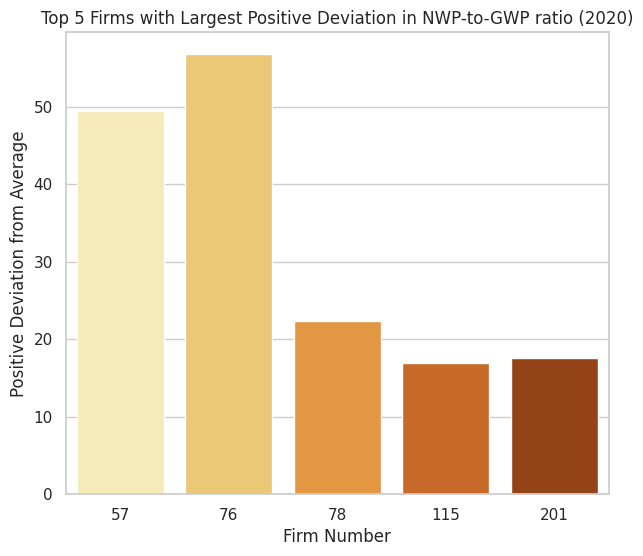

In [651]:
# Create function to identify and plot top firms that deviate significantly from the average (sign direction)
def plot_top_deviation_firms(df, columns, top_n=5):

    for column in columns: 
        # Calculatethe average for the metric
        avg_metric = df[column].median()
        # Calculate the deviation of each firm from the average
        deviation_column = f'{column} Deviation'
        df[deviation_column] = df[column] - avg_metric

    
        # Sort and selecting top firms based on deviation 
        if column == 'capital_surplus': 
            # For 'capital_surplus', sort ascending to find largest negative deviations 
            top_firms = df.sort_values(by=deviation_column, ascending=True).head(top_n) 
            title_suffix = 'Negative Deviation' 
        else: 
            # For other metrics, sort descending to find largest positive deviations 
            top_firms = df.sort_values(by=deviation_column, ascending=False).head(top_n) 
            title_suffix = 'Positive Deviation'

            
        plt.figure(figsize=(7, 6)) 
        sns.barplot(x='Firm', y=deviation_column, data=top_firms, palette='YlOrBr') 
        plt.title(f'Top {top_n} Firms with Largest {title_suffix} in {column} (2020)')
        plt.ylabel(f'{title_suffix} from Average')
        plt.xlabel('Firm Number') 
        plt.show() 
        
plot_top_deviation_firms(df_2020, ['NWP-to-GWP ratio'])

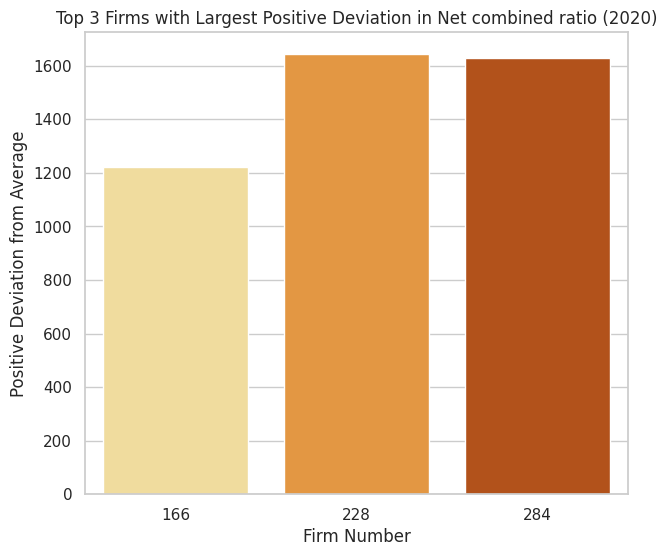

In [648]:
plot_top_deviation_firms(df_2020, ['Net combined ratio'], top_n=3)

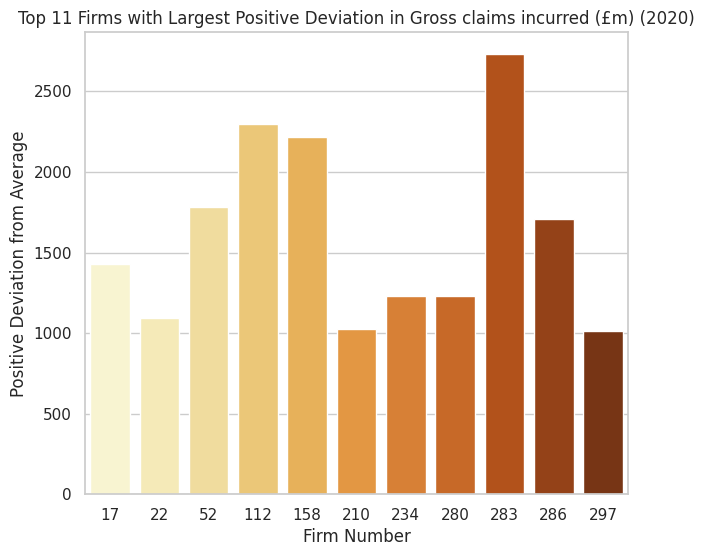

In [650]:
plot_top_deviation_firms(df_2020, ['Gross claims incurred (£m)'], top_n=11)

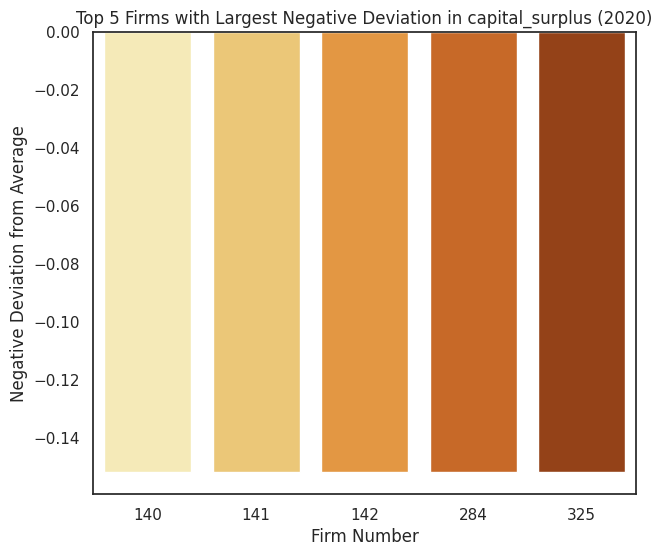

In [175]:
plot_top_deviation_firms(df_2020, ['capital_surplus'], top_n=5)

#### Deviation in absolute value

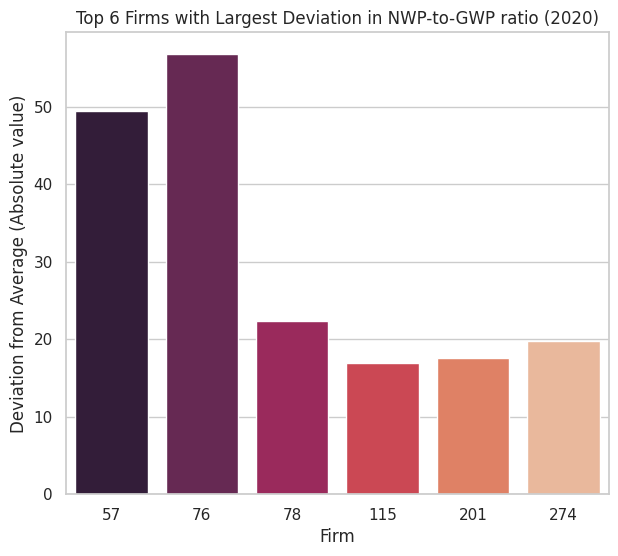

In [652]:
# Create function to identify and plot top firms that deviate significantly from the average in absolute value
def plot_top_deviation_firms_abs(df, metric, top_n=5): 

    # Calculatethe average for the metric 
    avg_metric = df[metric].median() 
    
    # Calculate the deviation of each firm from the average 
    df['Deviation'] = abs(df[metric] - avg_metric) 

    # Get the top firms with the largest deviation 
    top_deviation_firms = df.sort_values(by='Deviation', ascending=False).head(top_n) 

    plt.figure(figsize=(7, 6)) 
    sns.barplot(x='Firm', y='Deviation', data=top_deviation_firms, palette='rocket') 
    plt.title(f'Top {top_n} Firms with Largest Deviation in {metric} (2020)') 
    plt.xlabel('Firm') 
    plt.ylabel('Deviation from Average (Absolute value)') 
    plt.show() 

# Plot top firms with significant deviation for each metric 
plot_top_deviation_firms_abs(df_2020, 'NWP-to-GWP ratio', top_n=6) 

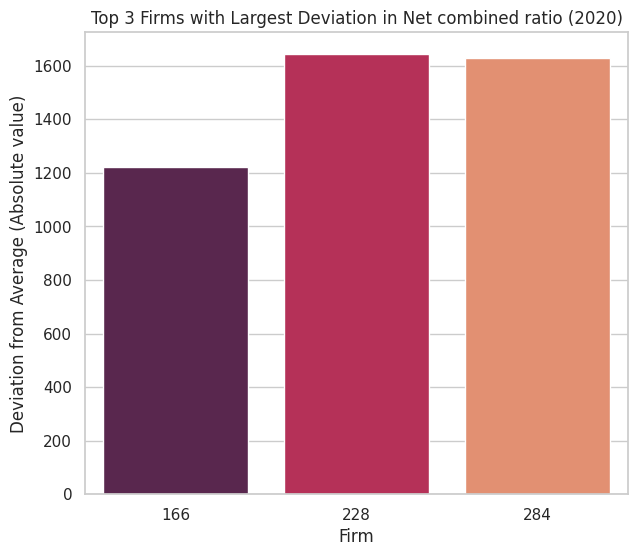

In [631]:
plot_top_deviation_firms_abs(df_2020, 'Net combined ratio', top_n=3) 

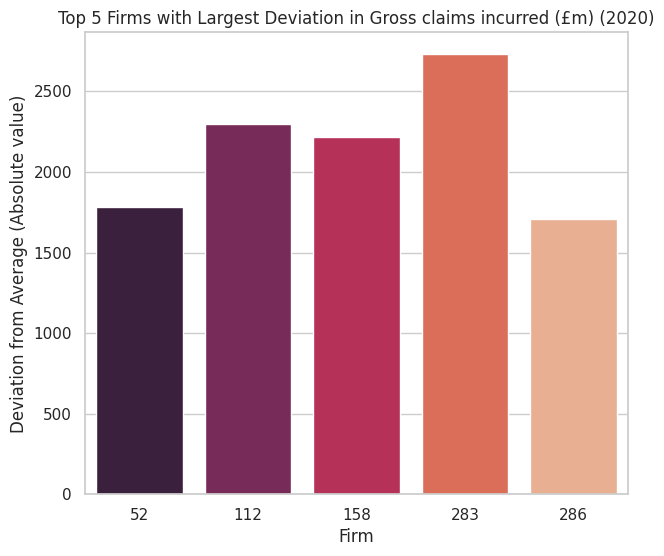

In [744]:
plot_top_deviation_firms_abs(df_2020, 'Gross claims incurred (£m)', top_n=5) 

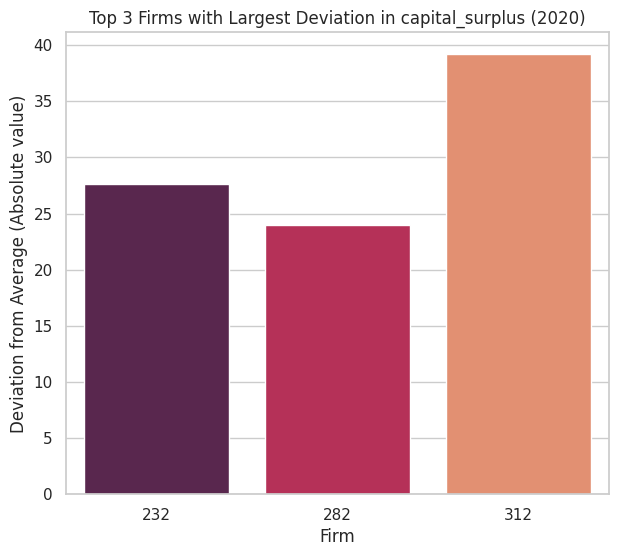

In [741]:
plot_top_deviation_firms_abs(df_2020, 'capital_surplus', top_n=3) 

### Corrrelation heatmap

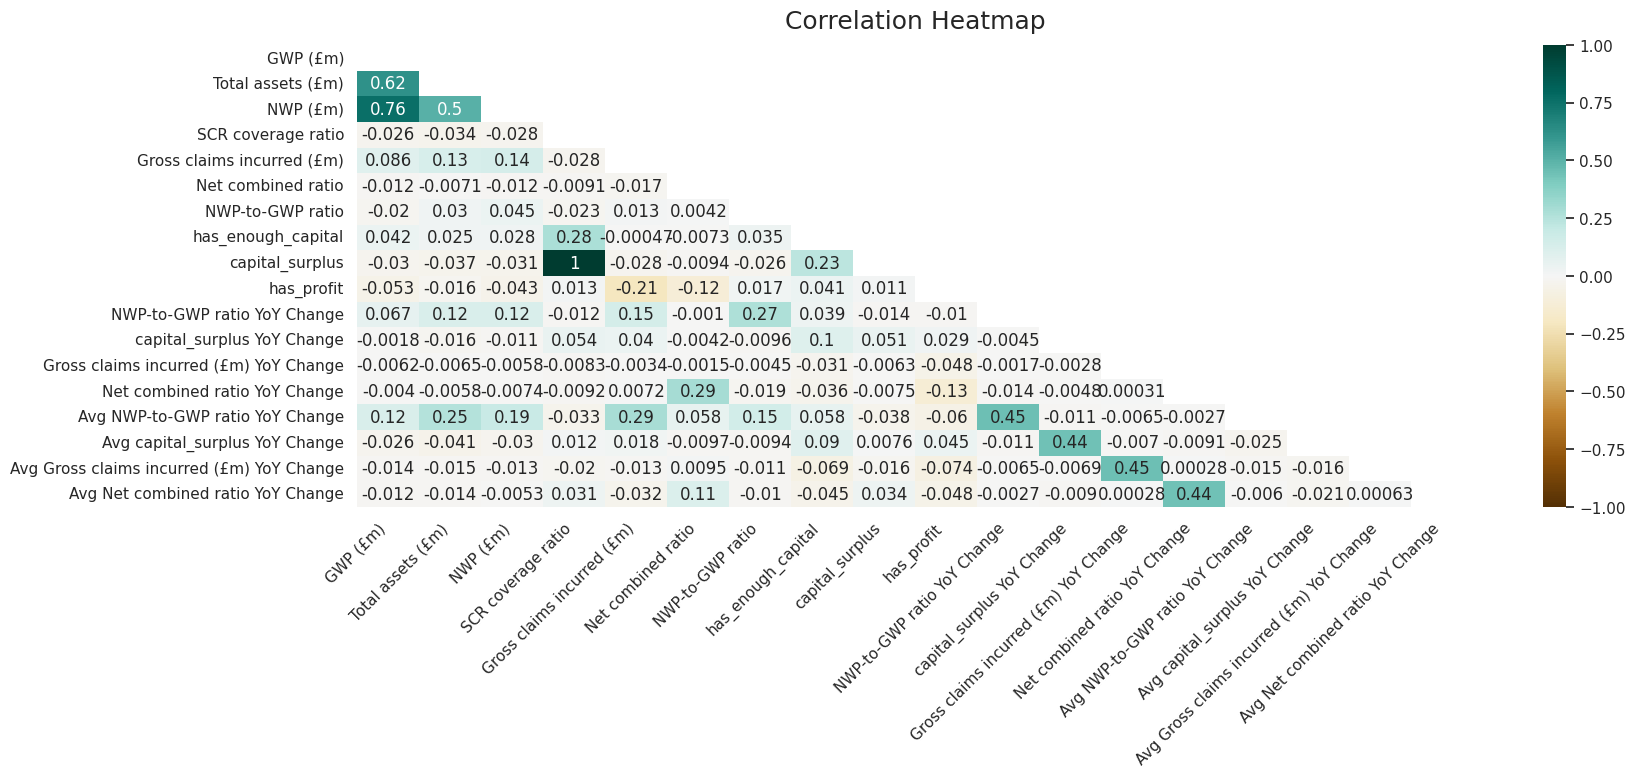

In [201]:
# Correlation Analysis 
# Select key metrics 
sns.set(style="white") 
correlation_metrics = df_full4.drop(['Firm', 'Year'], axis=1)

# Calculate the correlation matrix 
correlation_matrix = correlation_metrics.corr() 

# Plot the correlation heatmap 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) 

plt.figure(figsize=(18, 6)) 

heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='BrBG', mask=mask) 
labels = heatmap.get_xticklabels() 
plt.xticks(rotation=45, ha='right') 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12) 

plt.show() 

### Metric relationships

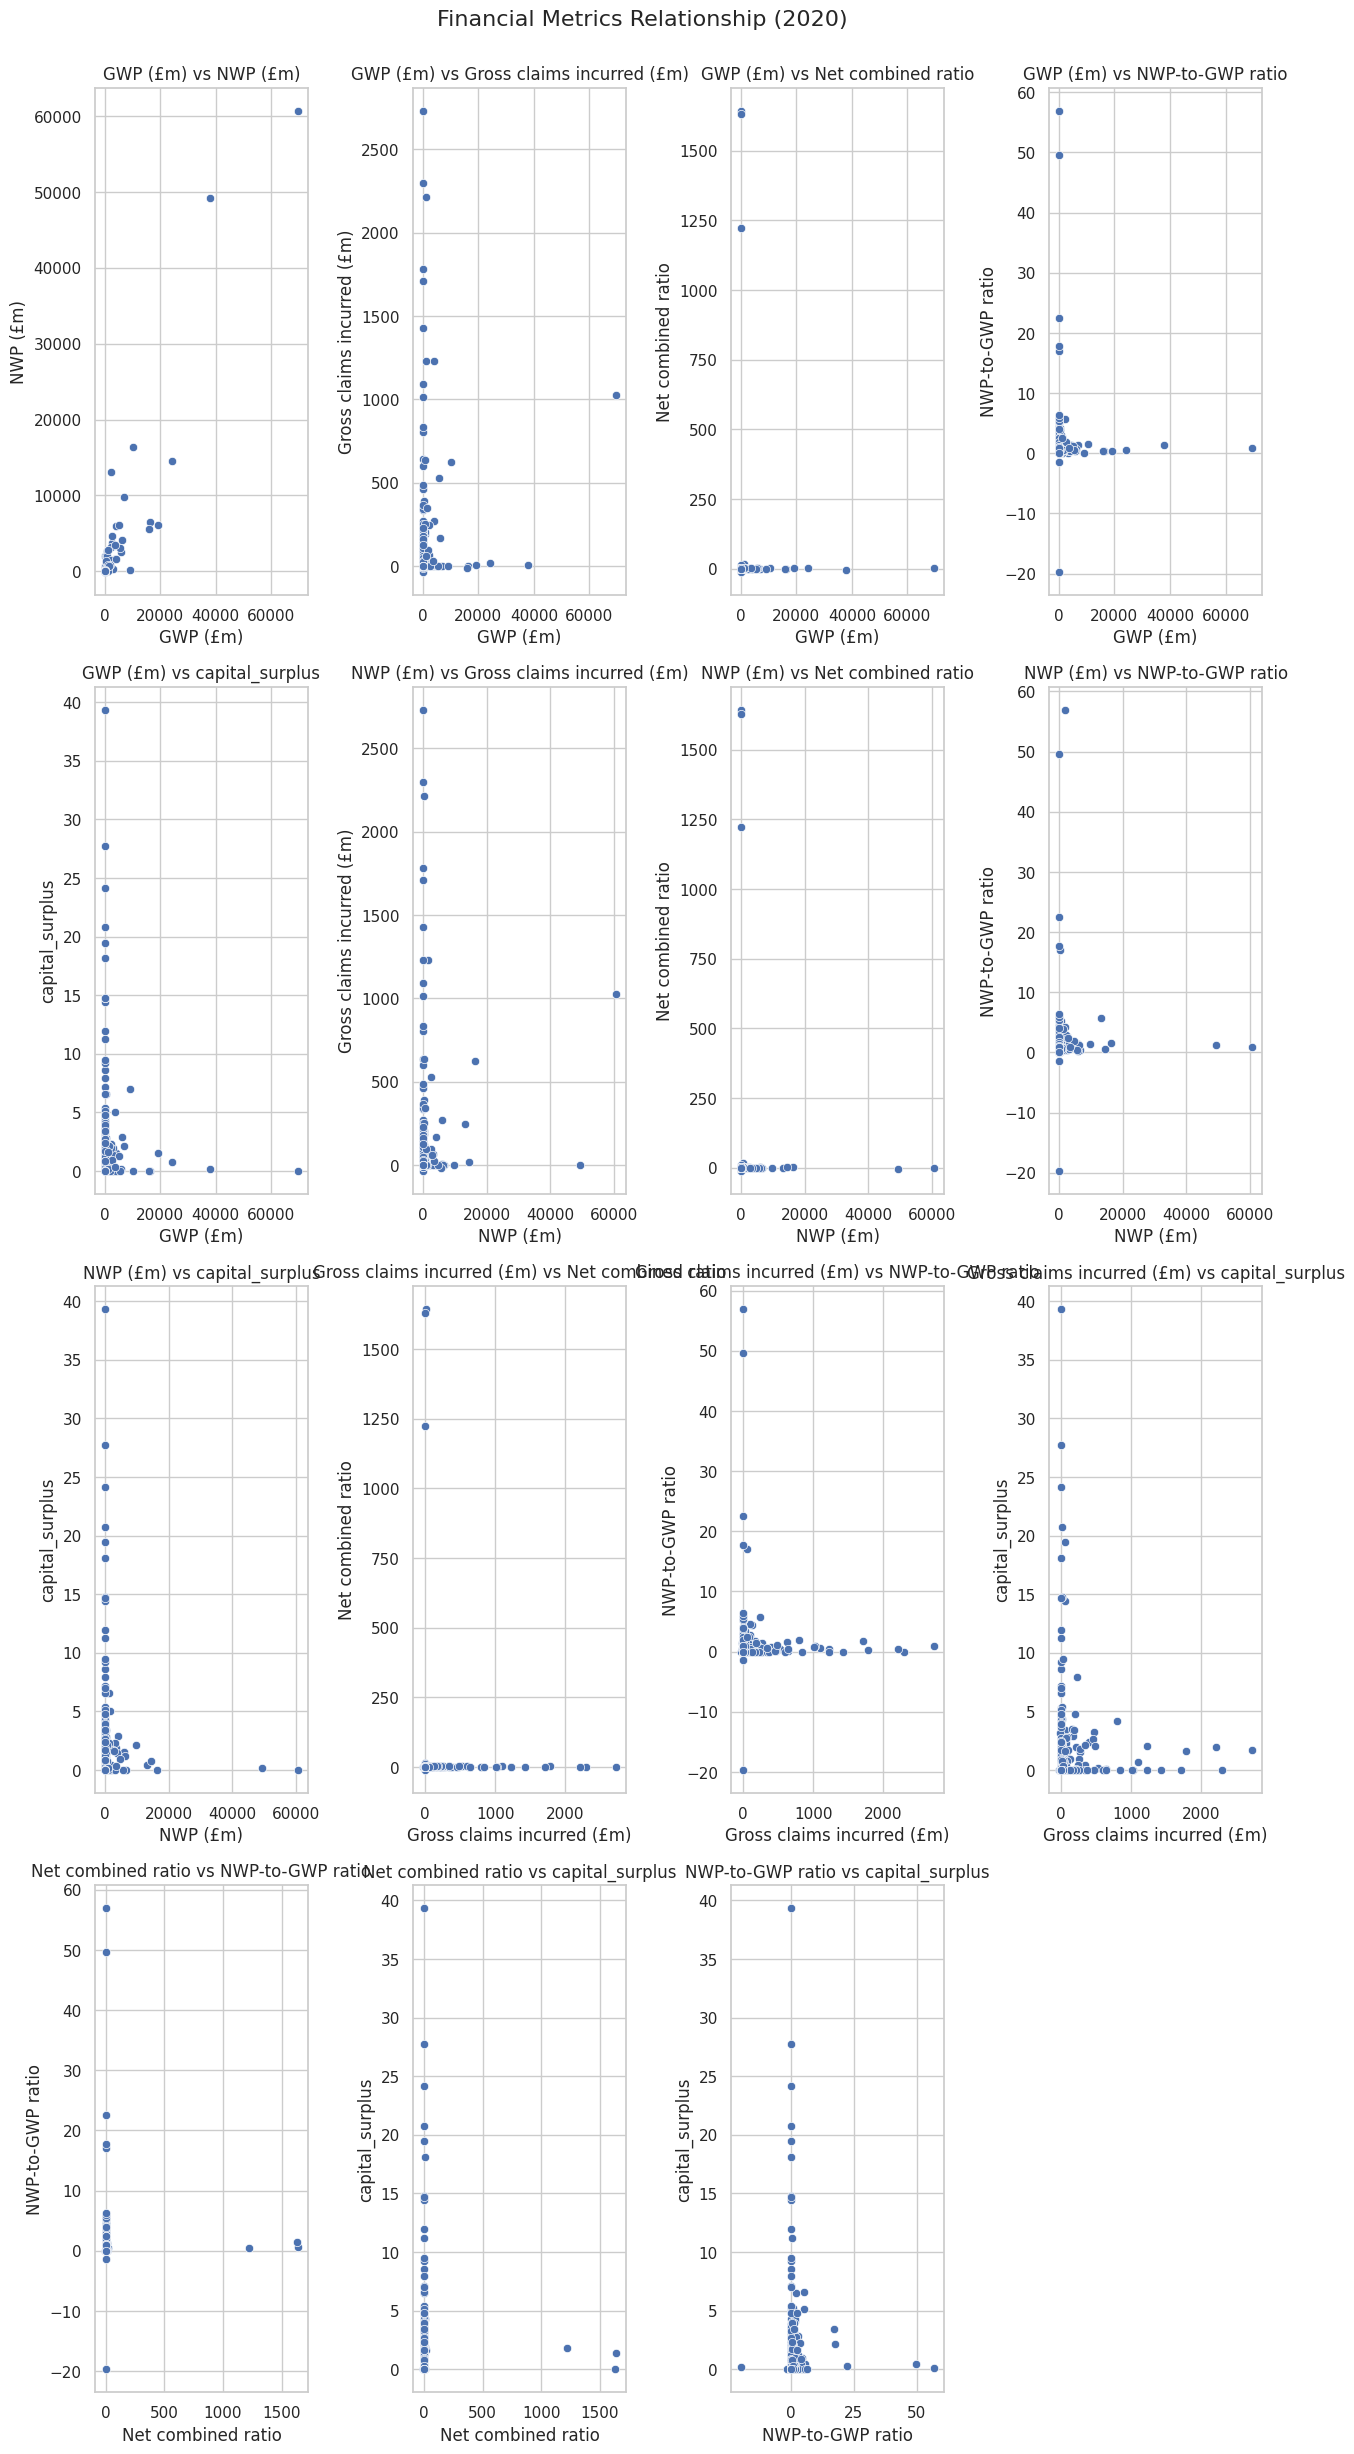

In [756]:
# Define metrics for plotting 
metrics = ['GWP (£m)', 'NWP (£m)', 'Gross claims incurred (£m)', 'Net combined ratio', 'NWP-to-GWP ratio', 'capital_surplus'] 

# Calculate the number of scatter plots needed 
num_metrics = len(metrics) 
num_plots = num_metrics * (num_metrics - 1) // 2 

plt.figure(figsize=(13, num_plots * 2)) 
plot_count = 1 

# Scatter plots for each combination of metrics 
for i in range(num_metrics): 
    for j in range(i + 1, num_metrics): 
        plt.subplot(num_plots // 3, 4, plot_count) 
        sns.scatterplot(x=metrics[i], y=metrics[j], data=df_full3[df_full3['Year'] == 2020]) 
        plt.title(f'{metrics[i]} vs {metrics[j]}') 
        plt.xlabel(metrics[i]) 
        plt.ylabel(metrics[j]) 
        plot_count += 1 
        
plt.suptitle('Financial Metrics Relationship (2020)', fontsize=16, y=1)  
plt.tight_layout() 
plt.show() 

In [ ]:
# export to csv so we can easily leverage later for our downstream analysis for efficiency purpose
df_full4.to_excel('df_full4.xlsx')

# ML Modelling

## Set-up

In [120]:
# Keep only the latest record for each firm
df_full5 = df_full4[df_full4['Year']==2020]
df_full5.shape

(297, 21)

In [150]:
# Input variables - select the relevant ones for modelling
df_2020_analysis = df_full5[[
 'Firm',
 'Gross claims incurred (£m)',
 'Net combined ratio',
 'NWP-to-GWP ratio',
 'has_enough_capital',
 'capital_surplus',
 'has_profit',
 'Avg NWP-to-GWP ratio YoY Change',
 'Avg capital_surplus YoY Change',
 'Avg Gross claims incurred (£m) YoY Change',
 'Avg Net combined ratio YoY Change']].reset_index(drop = True)

df_2020_analysis.head()

,Firm,Gross claims incurred (£m),Net combined ratio,NWP-to-GWP ratio,has_enough_capital,capital_surplus,has_profit,Avg NWP-to-GWP ratio YoY Change,Avg capital_surplus YoY Change,Avg Gross claims incurred (£m) YoY Change,Avg Net combined ratio YoY Change
0,2,0.000,0.000,0.815,1,2.171,1,54.872,0.248,-0.295,-0.245
1,3,0.000,0.000,1.436,0,0.000,1,6.017,0.786,0.000,0.000
2,4,3.668,-3.549,1.303,1,0.196,1,1.202,1.338,0.690,0.256
3,5,5.928,1.870,1.912,1,0.619,0,1.829,1.699,1.661,6.409
4,6,268.528,0.385,1.418,1,1.498,1,49.250,2.758,0.551,0.401


In [122]:
# export to csv so we can easily leverage later for our downstream analysis for efficiency purpose
df_2020_analysis.to_excel('df_2020_analysis.xlsx')

## PCA & K-means clustering

In [151]:
# Standardize the data 
scaler = StandardScaler()

X = df_2020_analysis.drop(columns = ['Firm']) # drop Firm as it is identifier

df_2020_scaled = scaler.fit_transform(X) 

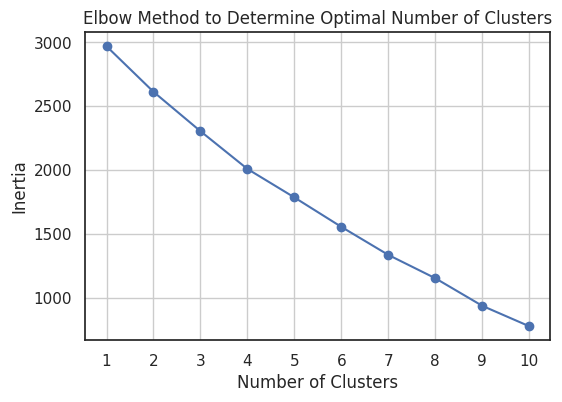

In [152]:
# Apply the Elbow Method to determine the optimal number of clusters for k-means clustering 

# List to store the inertia (Within-Cluster Sum of Square) values for different k 
inertia_values = [] 

# Test k values from 1 to 10 
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(df_2020_scaled) 
    inertia_values.append(kmeans.inertia_) 

plt.figure(figsize=(6, 4)) 
plt.plot(range(1, 11), inertia_values, marker='o') 
plt.title('Elbow Method to Determine Optimal Number of Clusters') 
plt.xlabel('Number of Clusters') 
plt.ylabel('Inertia') 
plt.xticks(range(1, 11)) 
plt.grid(True) 
plt.show() 

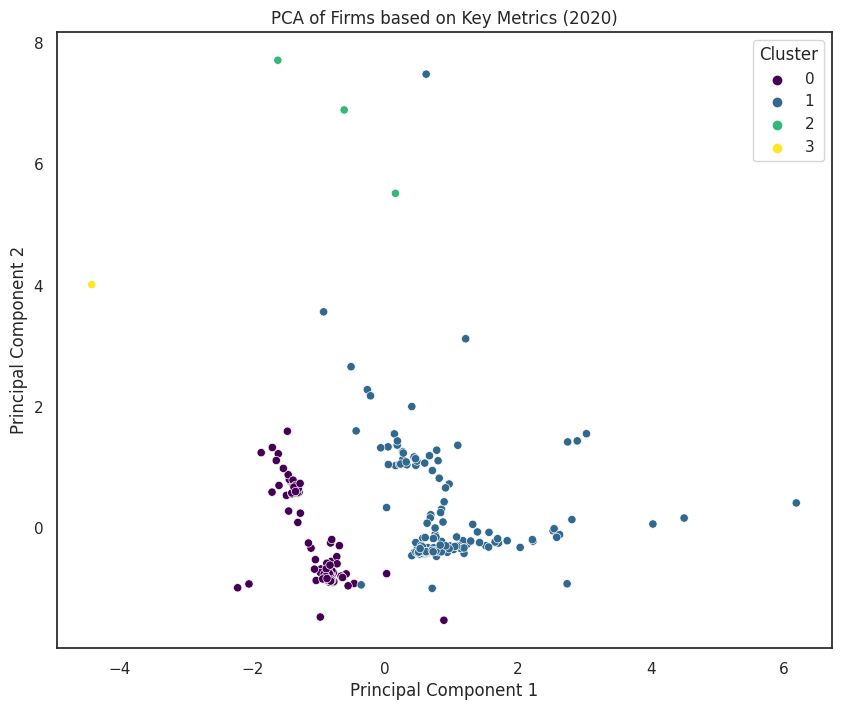

In [153]:
# K-means clustering 
kmeans = KMeans(n_clusters=4, random_state=42) 
clusters = kmeans.fit_predict(df_2020_scaled) 
df_2020_analysis['Cluster'] = clusters 
labels = kmeans.predict(df_2020_scaled)

# PCA for dimensionality reduction 
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(df_2020_scaled) 
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2']) 
principal_df['Cluster'] = clusters 

# Plot the PCA results 
plt.figure(figsize=(10, 8)) 
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=principal_df, palette='viridis') 
plt.title('PCA of Firms based on Key Metrics (2020)') 
plt.show() 

In [165]:
# Check data in cluster 2
df_2020_analysis[df_2020_analysis['Cluster']==2]

,Firm,Gross claims incurred (£m),Net combined ratio,NWP-to-GWP ratio,has_enough_capital,capital_surplus,has_profit,Avg NWP-to-GWP ratio YoY Change,Avg capital_surplus YoY Change,Avg Gross claims incurred (£m) YoY Change,Avg Net combined ratio YoY Change,Cluster
153,166,0.455,1222.879,0.503,1,1.830,0,18.735,0.18,13.950,-18.077,2
209,228,16.906,1642.927,0.557,1,1.342,0,3.064,-0.50,3355.740,0.000,2
260,284,2.200,1630.065,1.488,0,0.000,0,83.041,-0.50,0.234,0.224,2


In [166]:
# Check data in cluster 3
df_2020_analysis[df_2020_analysis['Cluster']==3]

,Firm,Gross claims incurred (£m),Net combined ratio,NWP-to-GWP ratio,has_enough_capital,capital_surplus,has_profit,Avg NWP-to-GWP ratio YoY Change,Avg capital_surplus YoY Change,Avg Gross claims incurred (£m) YoY Change,Avg Net combined ratio YoY Change,Cluster
27,29,21.452,2.419,0.0,0,0.0,0,0.0,0.0,38394.856,1.918,3


In [171]:
# Get mean summary
df_2020_analysis.drop(columns = ['Firm']).groupby('Cluster').mean()

,Gross claims incurred (£m),Net combined ratio,NWP-to-GWP ratio,has_enough_capital,capital_surplus,has_profit,Avg NWP-to-GWP ratio YoY Change,Avg capital_surplus YoY Change,Avg Gross claims incurred (£m) YoY Change,Avg Net combined ratio YoY Change
Cluster,,,,,,,,,,
0,121.791650,0.443350,0.382927,0.000000,0.000000,0.781022,2.287788,1.045445,15.503985,2.719453
1,112.168628,0.667417,1.751622,1.000000,3.366372,0.782051,7.232250,1.801096,16.707436,0.568404
2,6.520333,1498.623667,0.849333,0.666667,1.057333,0.000000,34.946667,-0.273333,1123.308000,-5.951000
3,21.452000,2.419000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38394.856000,1.918000


In [172]:
# Get summary
df_2020_analysis.drop(columns = ['Firm']).groupby('Cluster').describe()

Gross claims incurred (£m)                                           \
                             count        mean         std     min      25%   
Cluster                                                                       
0                            137.0  121.791650  330.094655 -34.379   0.0000   
1                            156.0  112.168628  353.003108 -13.169   0.0000   
2                              3.0    6.520333    9.036471   0.455   1.3275   
3                              1.0   21.452000         NaN  21.452  21.4520   

                                     Net combined ratio               \
             50%       75%       max              count         mean   
Cluster                                                                
0         0.3590  87.64300  2296.659              137.0     0.443350   
1         0.0275  49.09575  2730.730              156.0     0.667417   
2         2.2000   9.55300    16.906                3.0  1498.623667   
3        21.4520  21.45200    21.452                1.0     2.419000   

                                                                         \
                std       min       25%       50%         75%       max   
Cluster                                                                   
0          1.279237   -11.124     0.000     0.042     0.84200     5.178   
1          1.866247    -3.549     0.000     0.000     0.71225    15.858   
2        238.888465  1222.879  1426.472  1630.065  1636.49600  1642.927   
3               NaN     2.419     2.419     2.419     2.41900     2.419   

        NWP-to-GWP ratio                                                       \
                   count      mean       std     min     25%     50%      75%   
Cluster                                                                         
0                  137.0  0.382927  1.024227   0.000  0.0000  0.0000  0.18600   
1                  156.0  1.751622  6.735261 -19.689  0.0435  0.5345  1.38075   
2                    3.0  0.849333  0.553760   0.503  0.5300  0.5570  1.02250   
3                    1.0  0.000000       NaN   0.000  0.0000  0.0000  0.00000   

                has_enough_capital                                         \
            max              count      mean      std  min  25%  50%  75%   
Cluster                                                                     
0         6.335              137.0  0.000000  0.00000  0.0  0.0  0.0  0.0   
1        56.933              156.0  1.000000  0.00000  1.0  1.0  1.0  1.0   
2         1.488                3.0  0.666667  0.57735  0.0  0.5  1.0  1.0   
3         0.000                1.0  0.000000      NaN  0.0  0.0  0.0  0.0   

             capital_surplus                                            \
         max           count      mean       std    min    25%     50%   
Cluster                                                                  
0        0.0           137.0  0.000000  0.000000  0.000  0.000  0.0000   
1        1.0           156.0  3.366372  5.325956  0.004  0.786  1.8675   
2        1.0             3.0  1.057333  0.947629  0.000  0.671  1.3420   
3        0.0             1.0  0.000000       NaN  0.000  0.000  0.0000   

                         has_profit                                          \
             75%     max      count      mean       std  min  25%  50%  75%   
Cluster                                                                       
0        0.00000   0.000      137.0  0.781022  0.415071  0.0  1.0  1.0  1.0   
1        3.39825  39.335      156.0  0.782051  0.414182  0.0  1.0  1.0  1.0   
2        1.58600   1.830        3.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
3        0.00000   0.000        1.0  0.000000       NaN  0.0  0.0  0.0  0.0   

             Avg NWP-to-GWP ratio YoY Change                                \
         max                           count       mean        std     min   
Cluster                                                                      
0       

## Anomaly Detection with Isolation Forest 

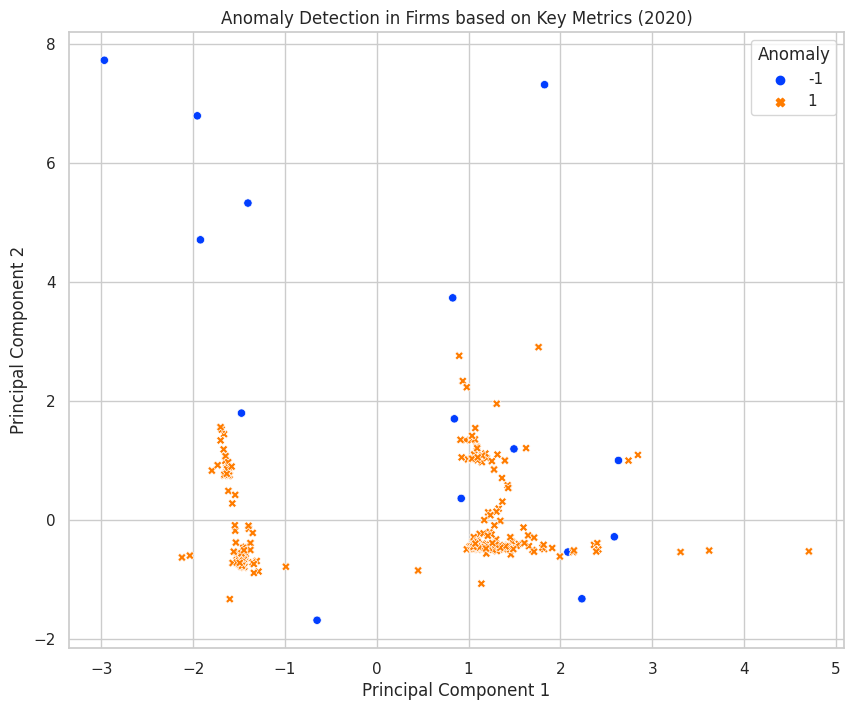

In [724]:
# Isolation Forest for anomaly detection 
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42) 

anomalies = iso_forest.fit_predict(df_2020_scaled) 

# Add anomaly detection results to the principal component df 
principal_df['Anomaly'] = anomalies 
  
plt.figure(figsize=(10, 8)) 
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Anomaly', style='Anomaly', data=principal_df, palette='bright') 
plt.title('Anomaly Detection in Firms based on Key Metrics (2020)') 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2') 
plt.show() 


In [ ]:
# Add the anomaly detection results to the df 
df_2020_analysis['Anomaly'] = anomalies 

# Filter to include only anomalies 
anomaly_data = df_2020_analysis[df_2020_analysis['Anomaly'] == -1] 
anomaly_data.shape

(15, 13)

In [726]:
anomaly_data.reset_index(drop=True)

,Firm,Gross claims incurred (£m),Net combined ratio,NWP-to-GWP ratio,has_enough_capital,capital_surplus,has_profit,Avg NWP-to-GWP ratio YoY Change,Avg capital_surplus YoY Change,Avg Gross claims incurred (£m) YoY Change,Avg Net combined ratio YoY Change,Cluster,Anomaly
0,29,21.451748,2.419128,0.000000,0,0.000000,0,0.000000,0.000000,30715.885158,1.534262,3,-1
1,37,639.228642,0.162686,0.029467,1,0.069010,1,-0.118500,-0.095996,1691.667953,-0.031729,1,-1
2,49,-2.120253,0.004843,0.816287,1,2.095782,1,3.908450,-0.085302,16.686786,-116.199662,1,-1
3,76,0.000000,0.000000,56.932801,1,0.077857,1,14.800805,-0.200000,33.951981,0.000000,1,-1
4,93,0.000000,0.000000,1.631975,1,4.606870,1,-0.560053,49.163118,0.000000,0.000000,1,-1
5,105,530.529650,1.840720,0.446054,1,0.171555,0,236.722137,-0.350392,-0.094156,0.069618,1,-1
6,146,0.400759,6.825804,0.000000,1,18.136484,0,0.370228,0.293019,-5.011952,-5.921514,1,-1
7,158,2214.251988,0.129318,0.356987,1,1.971202,1,0.589497,31.048286,8.287948,0.097561,1,-1
8,166,0.455034,1222.879483,0.502720,1,1.829825,0,14.988008,0.143834,11.159609,-14.461367,2,-1
9,181,0.000000,0.000000,0.000000,0,0.000000,1,-0.436566,55.828445,0.000000,0.000000,0,-1
